In [1]:
import numpy as np
import uproot3 as up3
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator


In [2]:
base_dir = "/home/lmlepin/Desktop/dm_sets/"
figs_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/truth_plots/"

             q2   outE.fX   outE.fY   outE.fZ   outE.fE   outP.fX   outP.fY  \
entry                                                                         
0      0.011813  0.272419  0.089050  0.758263  0.810621  0.264384  0.048283   
1      0.005112  0.692532  0.062913  1.363373  1.530472  0.388827  0.071494   
2      0.005842  0.075150 -0.005324  0.093854  0.120353  0.050881 -0.026075   
3      0.001433  0.061763  0.010632  0.179085  0.189735  0.048932 -0.015823   
4      0.001504  2.584225  0.252851  4.945625  5.585818  0.008022 -0.001858   

        outP.fZ   outP.fE     vV.fX     vV.fY     vV.fZ     vV.fE  vV_pr.fX  \
entry                                                                         
0      0.625452  0.680750  0.536803  0.137333  1.383716  1.491371 -0.044495   
1      0.751264  0.848938  1.081359  0.134407  2.114637  2.379410  0.172389   
2      0.148409  0.159042  0.126031 -0.031399  0.242263  0.279395  0.021724   
3      0.064411  0.082424  0.110694 -0.005191  0.24

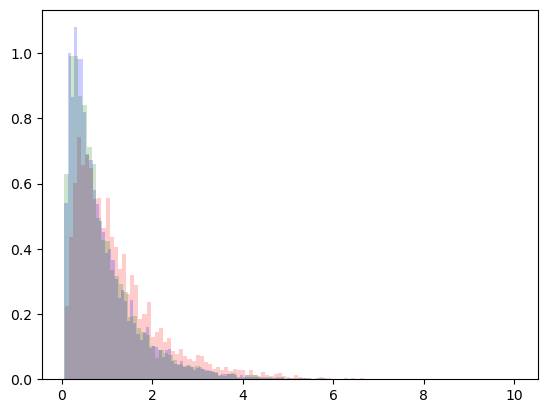

In [3]:
file_a = "hepevt_events_eta_decay_ratio_0.6_ma_0.05.root"
variables=["q2","outE","outP", "vV", "vV_pr"]
tree_a = up3.open(base_dir + file_a)["event_tree"]
df_a = tree_a.pandas.df(variables)


print(df_a.head())

file_b = "hepevt_events_pi0_decay_ratio_0.6_ma_0.05.root"
tree_b = up3.open(base_dir + file_b)["event_tree"]
df_b = tree_b.pandas.df(variables)

file_c = "hepevt_events_eta_decay_ratio_2.0_ma_0.05.root"
tree_c = up3.open(base_dir + file_c)["event_tree"]
df_c = tree_c.pandas.df(variables)


'''variable_a = df_a['outE_pr.fE'] + df_a['outP_pr.fE']
variable_b = df_b['outE_pr.fE'] + df_b['outP_pr.fE']
variable_c = df_c['outE_pr.fE'] + df_c['outP_pr.fE']

'''

variable_a = df_a['vV_pr.fE']
variable_b = df_b['vV_pr.fE']
variable_c = df_c['vV_pr.fE']

plt.hist(variable_a,bins=100,color='red',alpha=0.2,density=True)
plt.hist(variable_b,bins=100,color='blue',alpha=0.2,density=True)
plt.hist(variable_c,bins=100,color='green',alpha=0.2,density=True)
plt.show()

In [8]:
fhc_pi0_df = pd.read_csv(base_dir + "pi0s.dat", sep = ' ', header = None)
fhc_eta_df = pd.read_csv(base_dir + "etas.dat", sep = ' ', header = None)
rhc_pi0_df = pd.read_csv(base_dir + "rhc_pi0s.dat", sep = ' ', header = None)
rhc_eta_df = pd.read_csv(base_dir + "rhc_etas.dat", sep = ' ', header = None)

In [9]:
# plot globals:

axis_label_size = 45
title_size = 45
legend_text_size = 45
text_padding = 15
x_ticks_size = 35
y_ticks_size = 35

figure_size = (16,16)

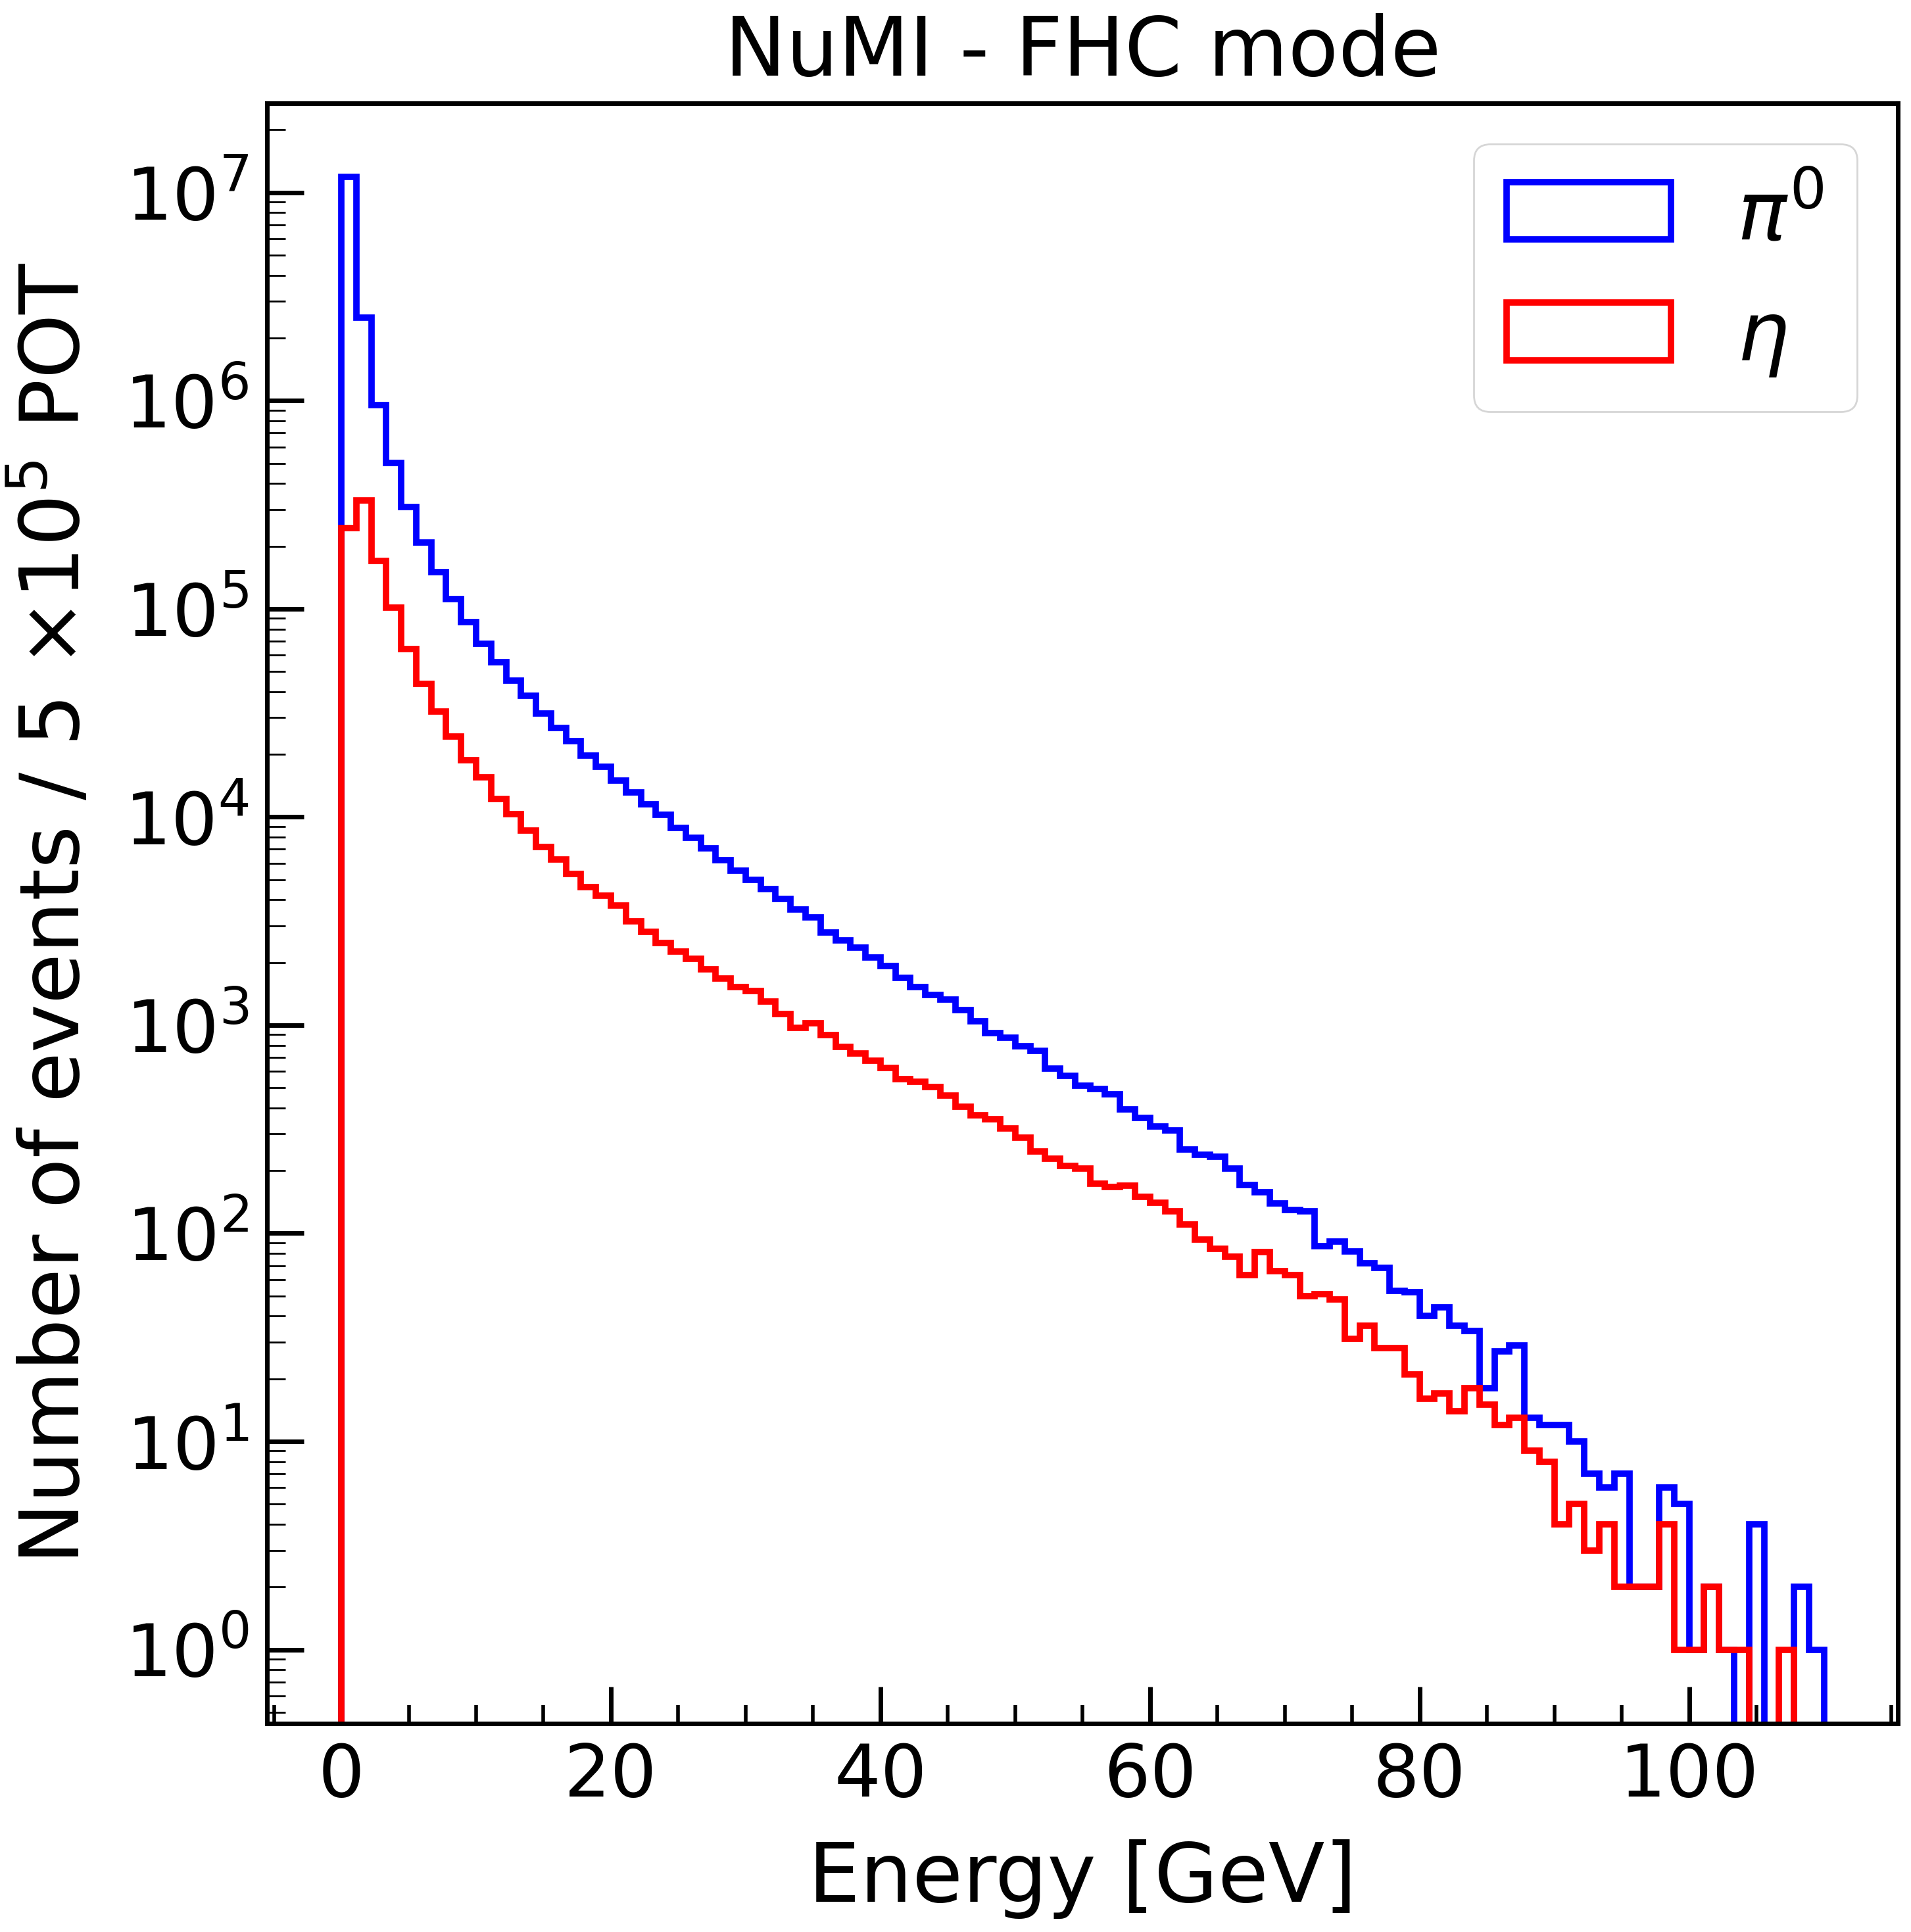

In [12]:
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    

binning = np.linspace(0.,110.,100)
plt.hist(fhc_pi0_df[3],bins=binning,histtype='step',weights=fhc_pi0_df[8],color='blue',linewidth=3.5,label=r'$\pi^{0}$')
plt.hist(fhc_eta_df[3],bins=binning,histtype='step',weights=fhc_eta_df[8],color='red',linewidth=3.5,label=r'$\eta$')
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=40)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False,labelsize=40)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=40)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False,labelsize=40)
plt.yscale('log')
plt.legend(fontsize=45)
plt.title(r"NuMI - FHC mode",fontsize=45,pad=15)
plt.xlabel(r'Energy [GeV]',fontsize=45,labelpad=15)
plt.ylabel(r'Number of events / 5 $\times 10^{5}$ POT ',fontsize=45,labelpad=15)
plt.savefig(figs_dir + "fhc_neutral_meson_flux.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "fhc_neutral_meson_flux.png", bbox_inches="tight")
plt.show()

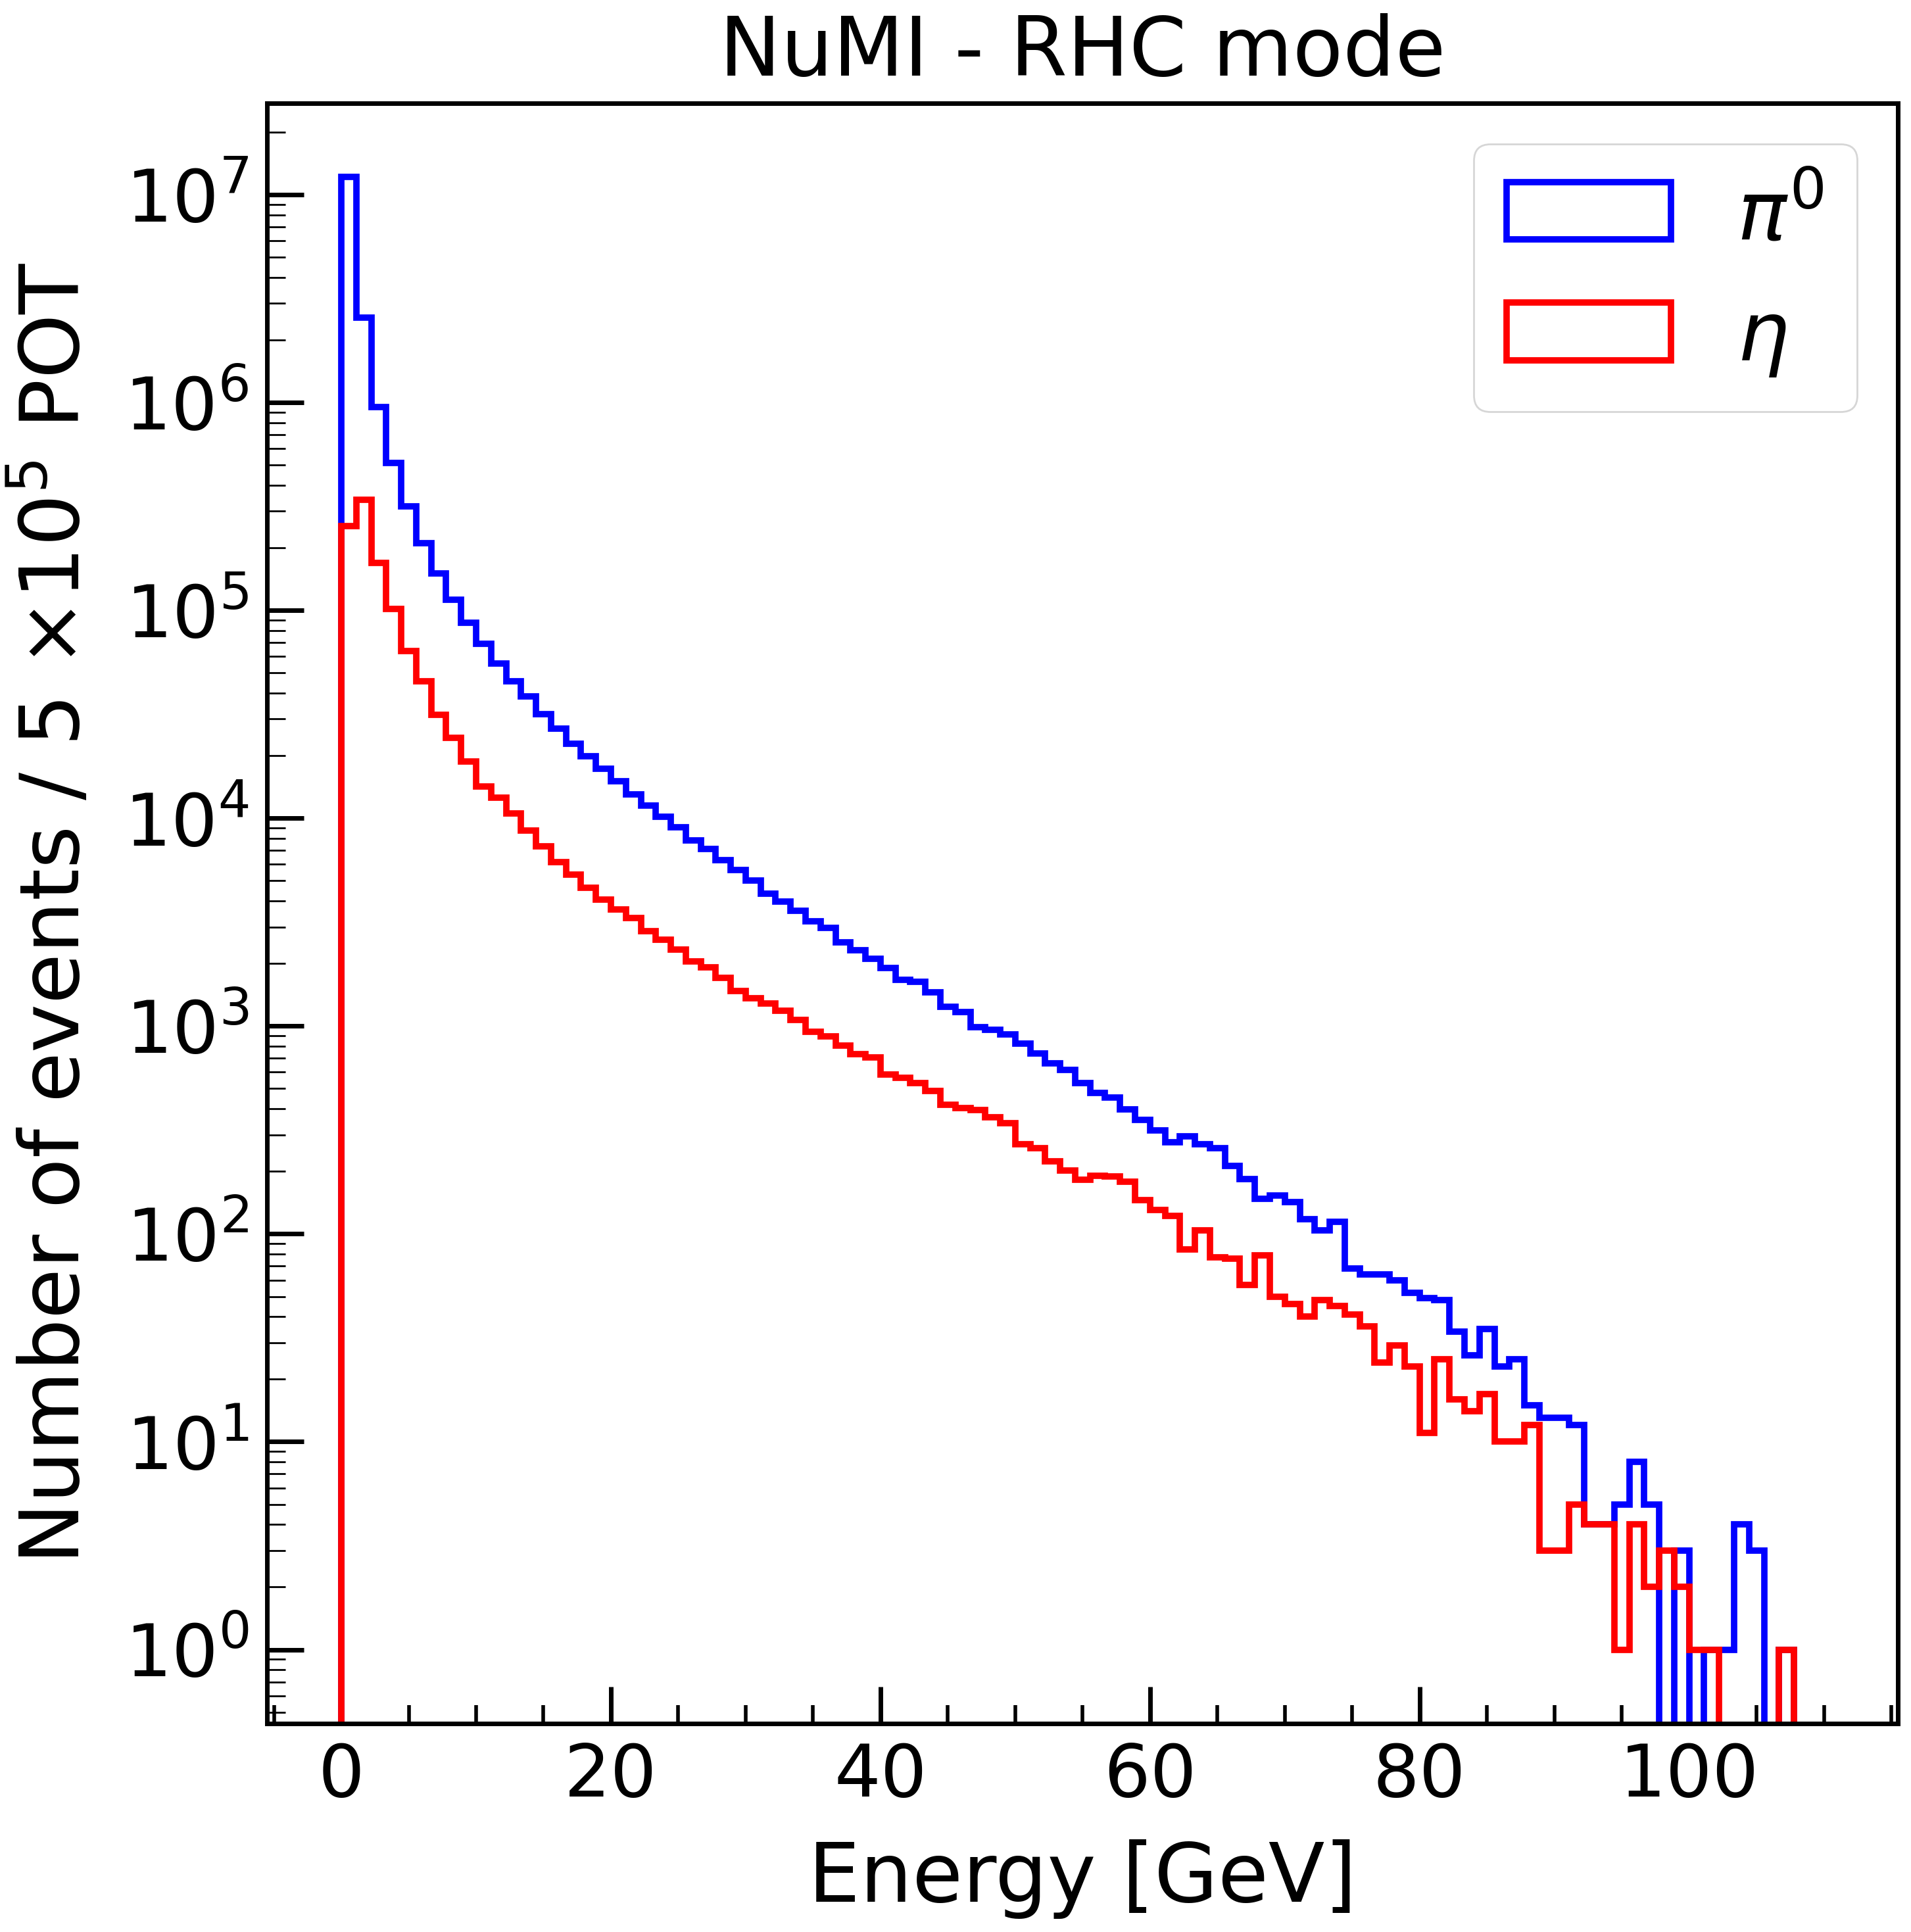

In [13]:
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    

binning = np.linspace(0.,110.,100)
plt.hist(rhc_pi0_df[3],bins=binning,histtype='step',weights=rhc_pi0_df[8],color='blue',linewidth=3.5,label=r'$\pi^{0}$')
plt.hist(rhc_eta_df[3],bins=binning,histtype='step',weights=rhc_eta_df[8],color='red',linewidth=3.5,label=r'$\eta$')
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=40)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False,labelsize=40)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=40)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False,labelsize=40)
plt.yscale('log')
plt.legend(fontsize=45)
plt.title(r"NuMI - RHC mode",fontsize=45,pad=15)
plt.xlabel(r'Energy [GeV]',fontsize=45,labelpad=15)
plt.ylabel(r'Number of events / 5 $\times 10^{5}$ POT ',fontsize=45,labelpad=15)
plt.savefig(figs_dir + "rhc_neutral_meson_flux.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "rhc_neutral_meson_flux.png", bbox_inches="tight")
plt.show()

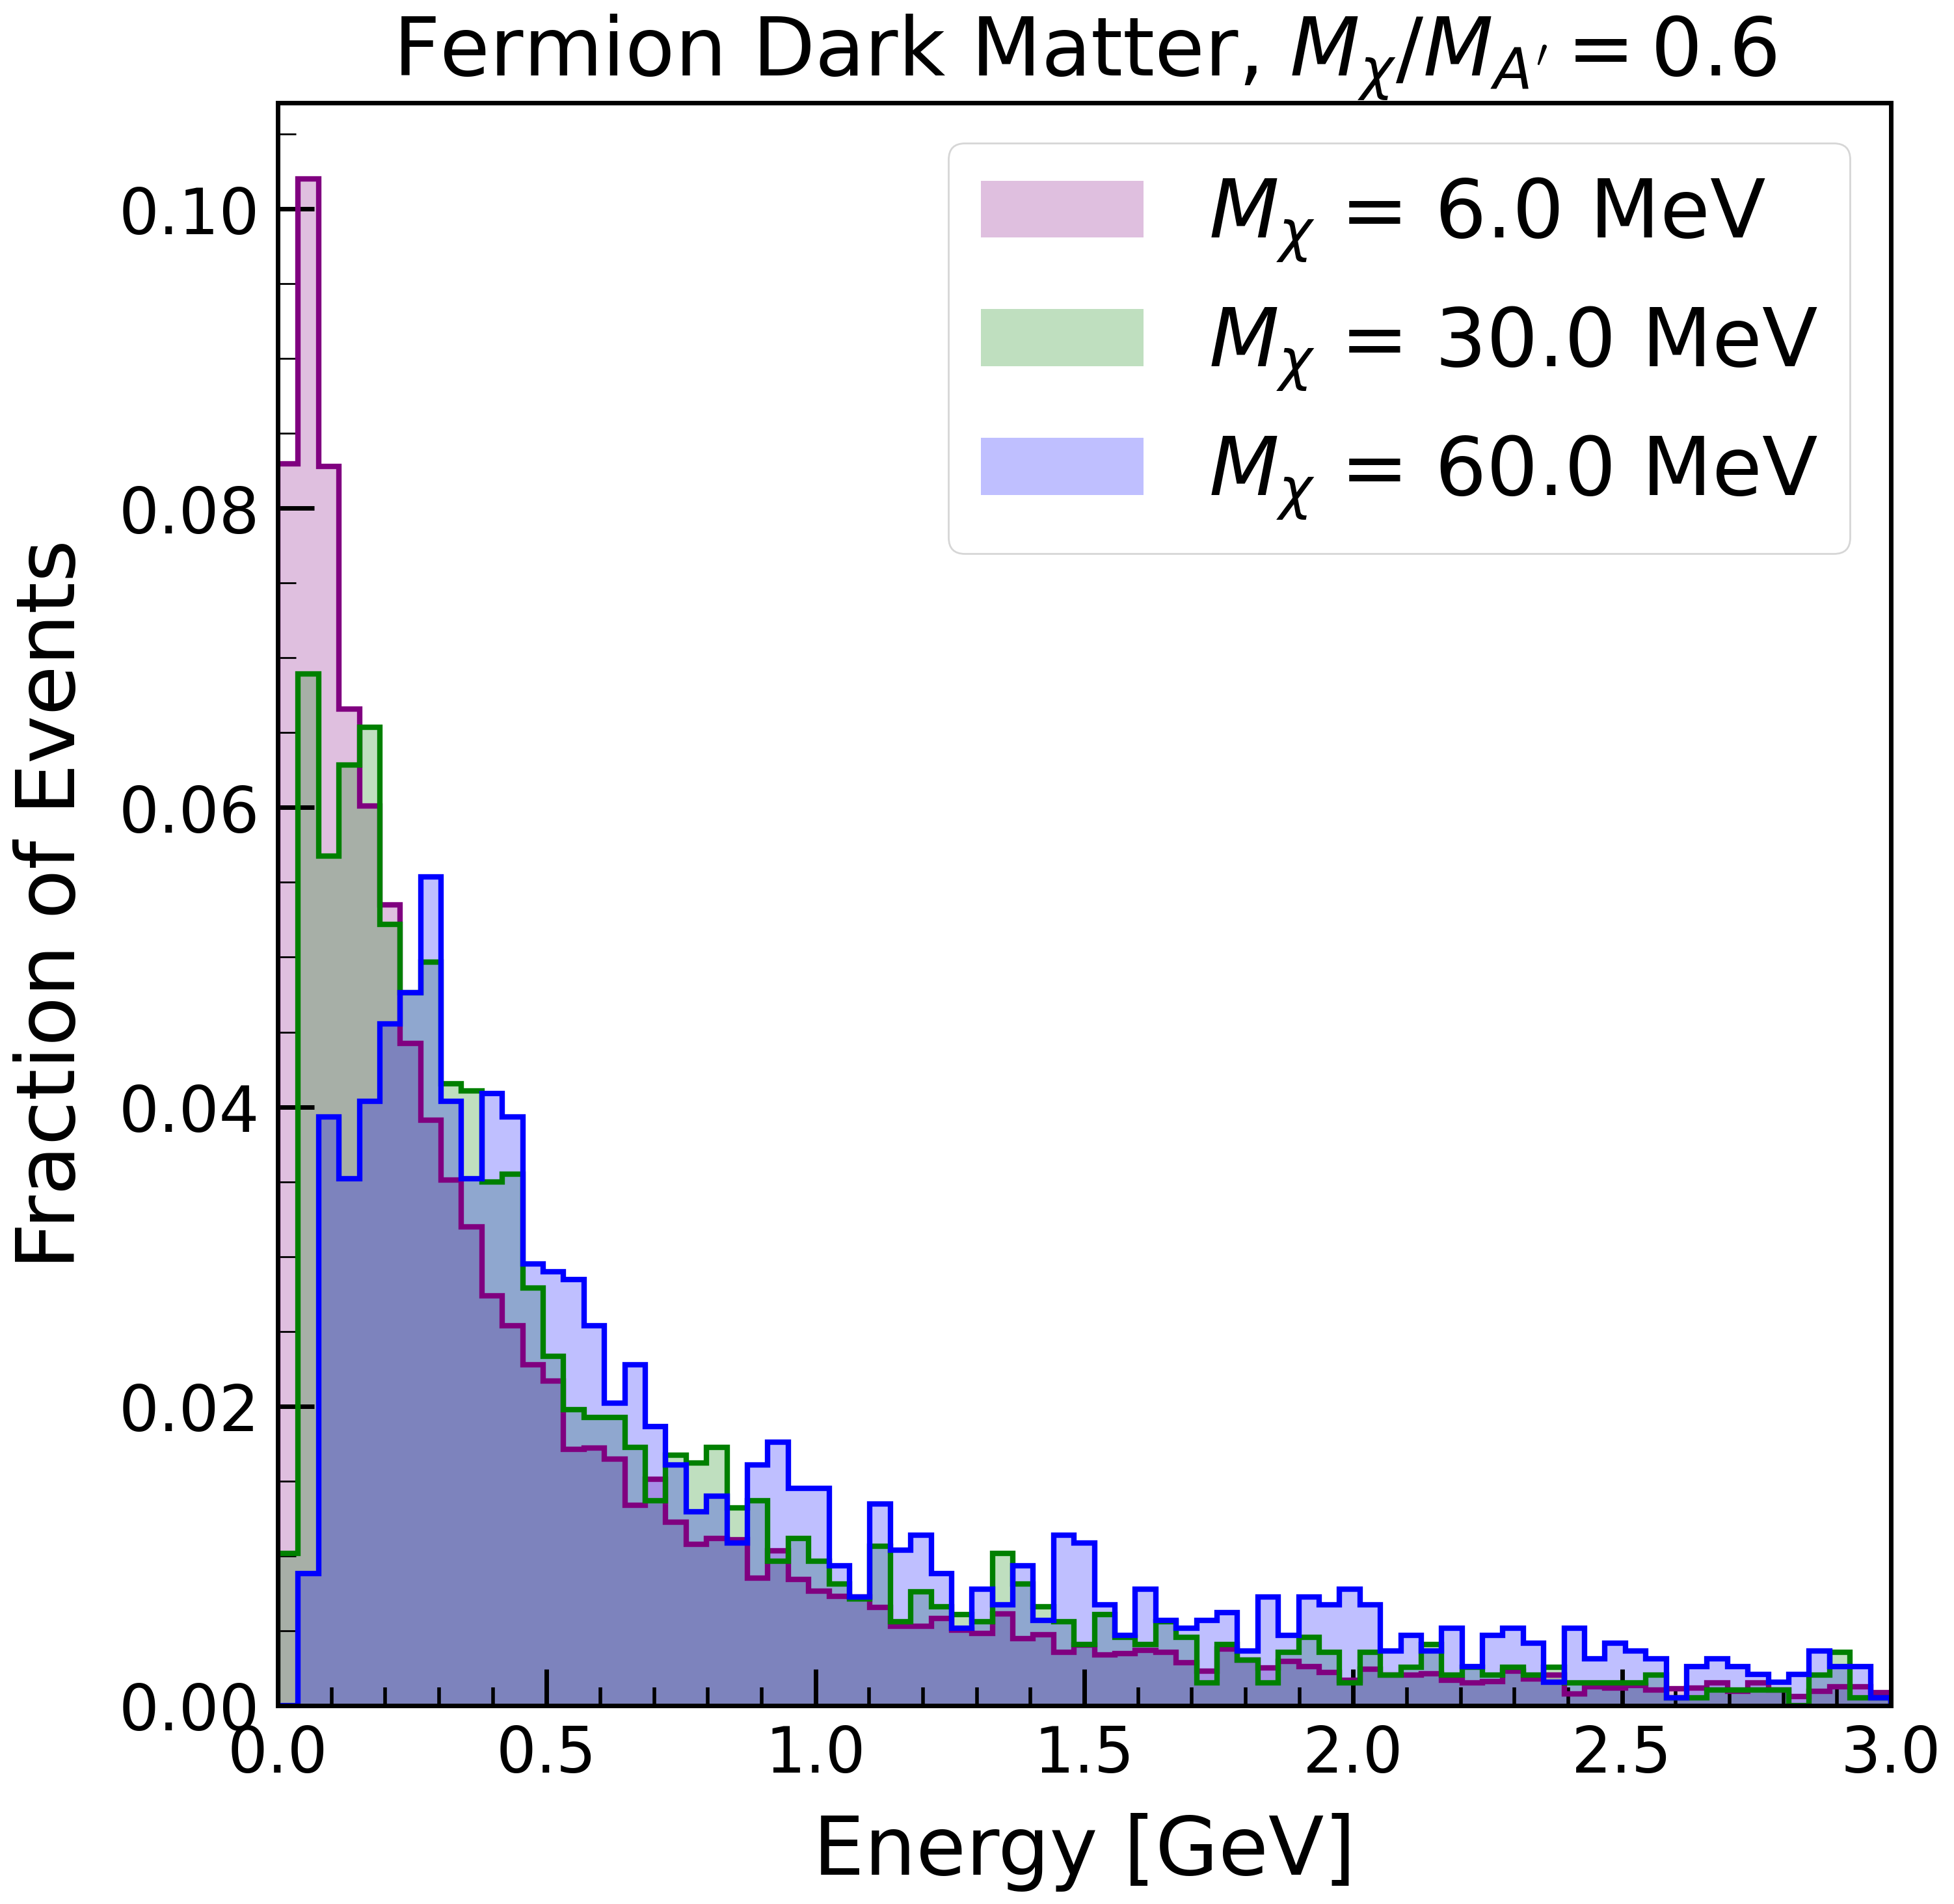

In [14]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    
binning=np.linspace(0.,3.,80)
    
masses = [0.01, 0.05, 0.1]  
colors = ['purple', 'green', 'blue']
i=0
for m in masses:
    input_file = "events_" + str(m) + "_fermion_0.root"
    input_tree = up3.open(base_dir + input_file)["event_tree"]
    df = input_tree.pandas.df(df_vars, flatten=False)
    (counts, bins) = np.histogram(df['dm_energy'],binning)
    plt.hist(bins[:-1],bins=binning,histtype='stepfilled',weights=counts/np.sum(counts),color=colors[i],alpha=0.25,label=r"$M_{\chi}$ = " + str(1000*m*0.6) + " MeV")
    plt.hist(bins[:-1],bins=binning,histtype='step',weights=counts/np.sum(counts),color=colors[i],linewidth=3)
    i+=1
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(fontsize=45)
plt.xlim(0.,3.)
plt.title(r"Fermion Dark Matter, $M_{\chi}/M_{A'} = 0.6$",fontsize=title_size,pad=text_padding)
plt.xlabel(r'Energy [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_dark_matter_flux_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "bdnmc_dark_matter_flux_ratio_0.6.png", bbox_inches="tight")
plt.show()

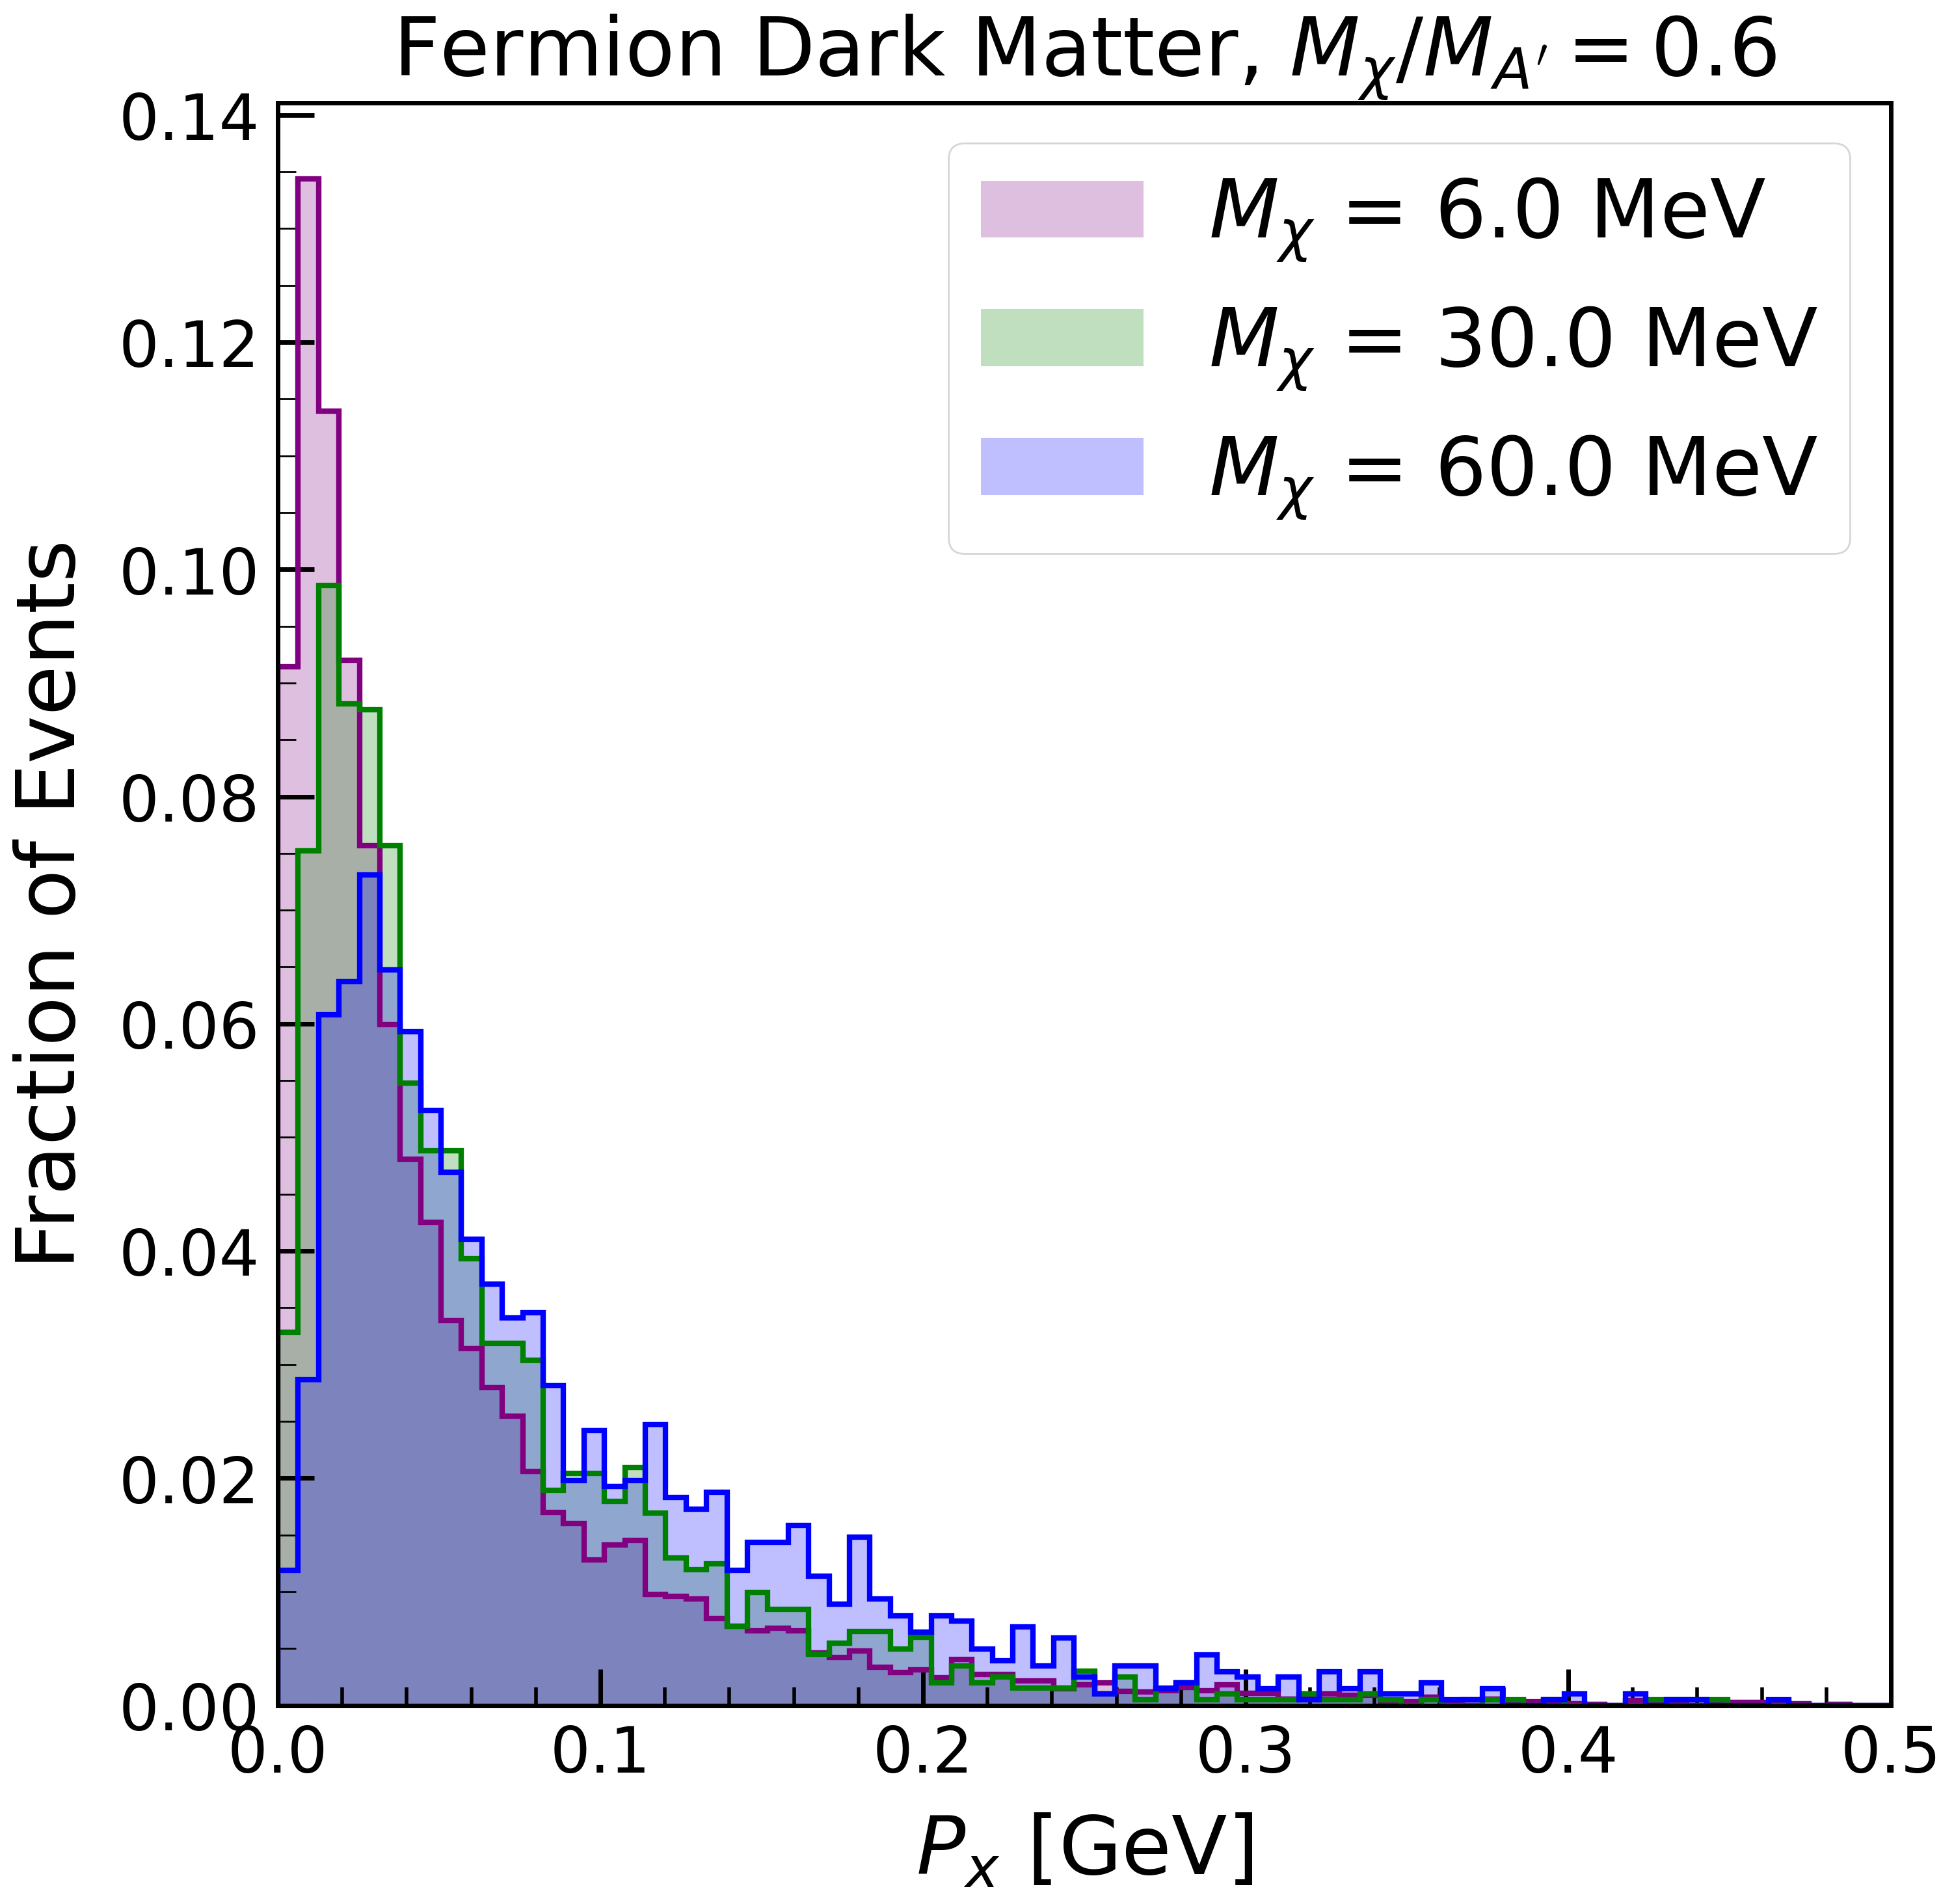

In [19]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    
binning=np.linspace(0.,0.5,80)
    
masses = [0.01, 0.05, 0.1]  
colors = ['purple', 'green', 'blue']
i=0
for m in masses:
    input_file = "events_" + str(m) + "_fermion_0.root"
    input_tree = up3.open(base_dir + input_file)["event_tree"]
    df = input_tree.pandas.df(df_vars, flatten=False)
    (counts, bins) = np.histogram(df['dm_px'],binning)
    plt.hist(bins[:-1],bins=binning,histtype='stepfilled',weights=counts/np.sum(counts),color=colors[i],alpha=0.25,label=r"$M_{\chi}$ = " + str(1000*m*0.6) + " MeV")
    plt.hist(bins[:-1],bins=binning,histtype='step',weights=counts/np.sum(counts),color=colors[i],linewidth=3)
    i+=1
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(fontsize=45)
plt.xlim(0.,0.5)
plt.title(r"Fermion Dark Matter, $M_{\chi}/M_{A'} = 0.6$",fontsize=title_size,pad=text_padding)
plt.xlabel(r'$P_{x}$ [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_dark_matter_px_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "bdnmc_dark_matter_px_ratio_0.6.png", bbox_inches="tight")
plt.show()

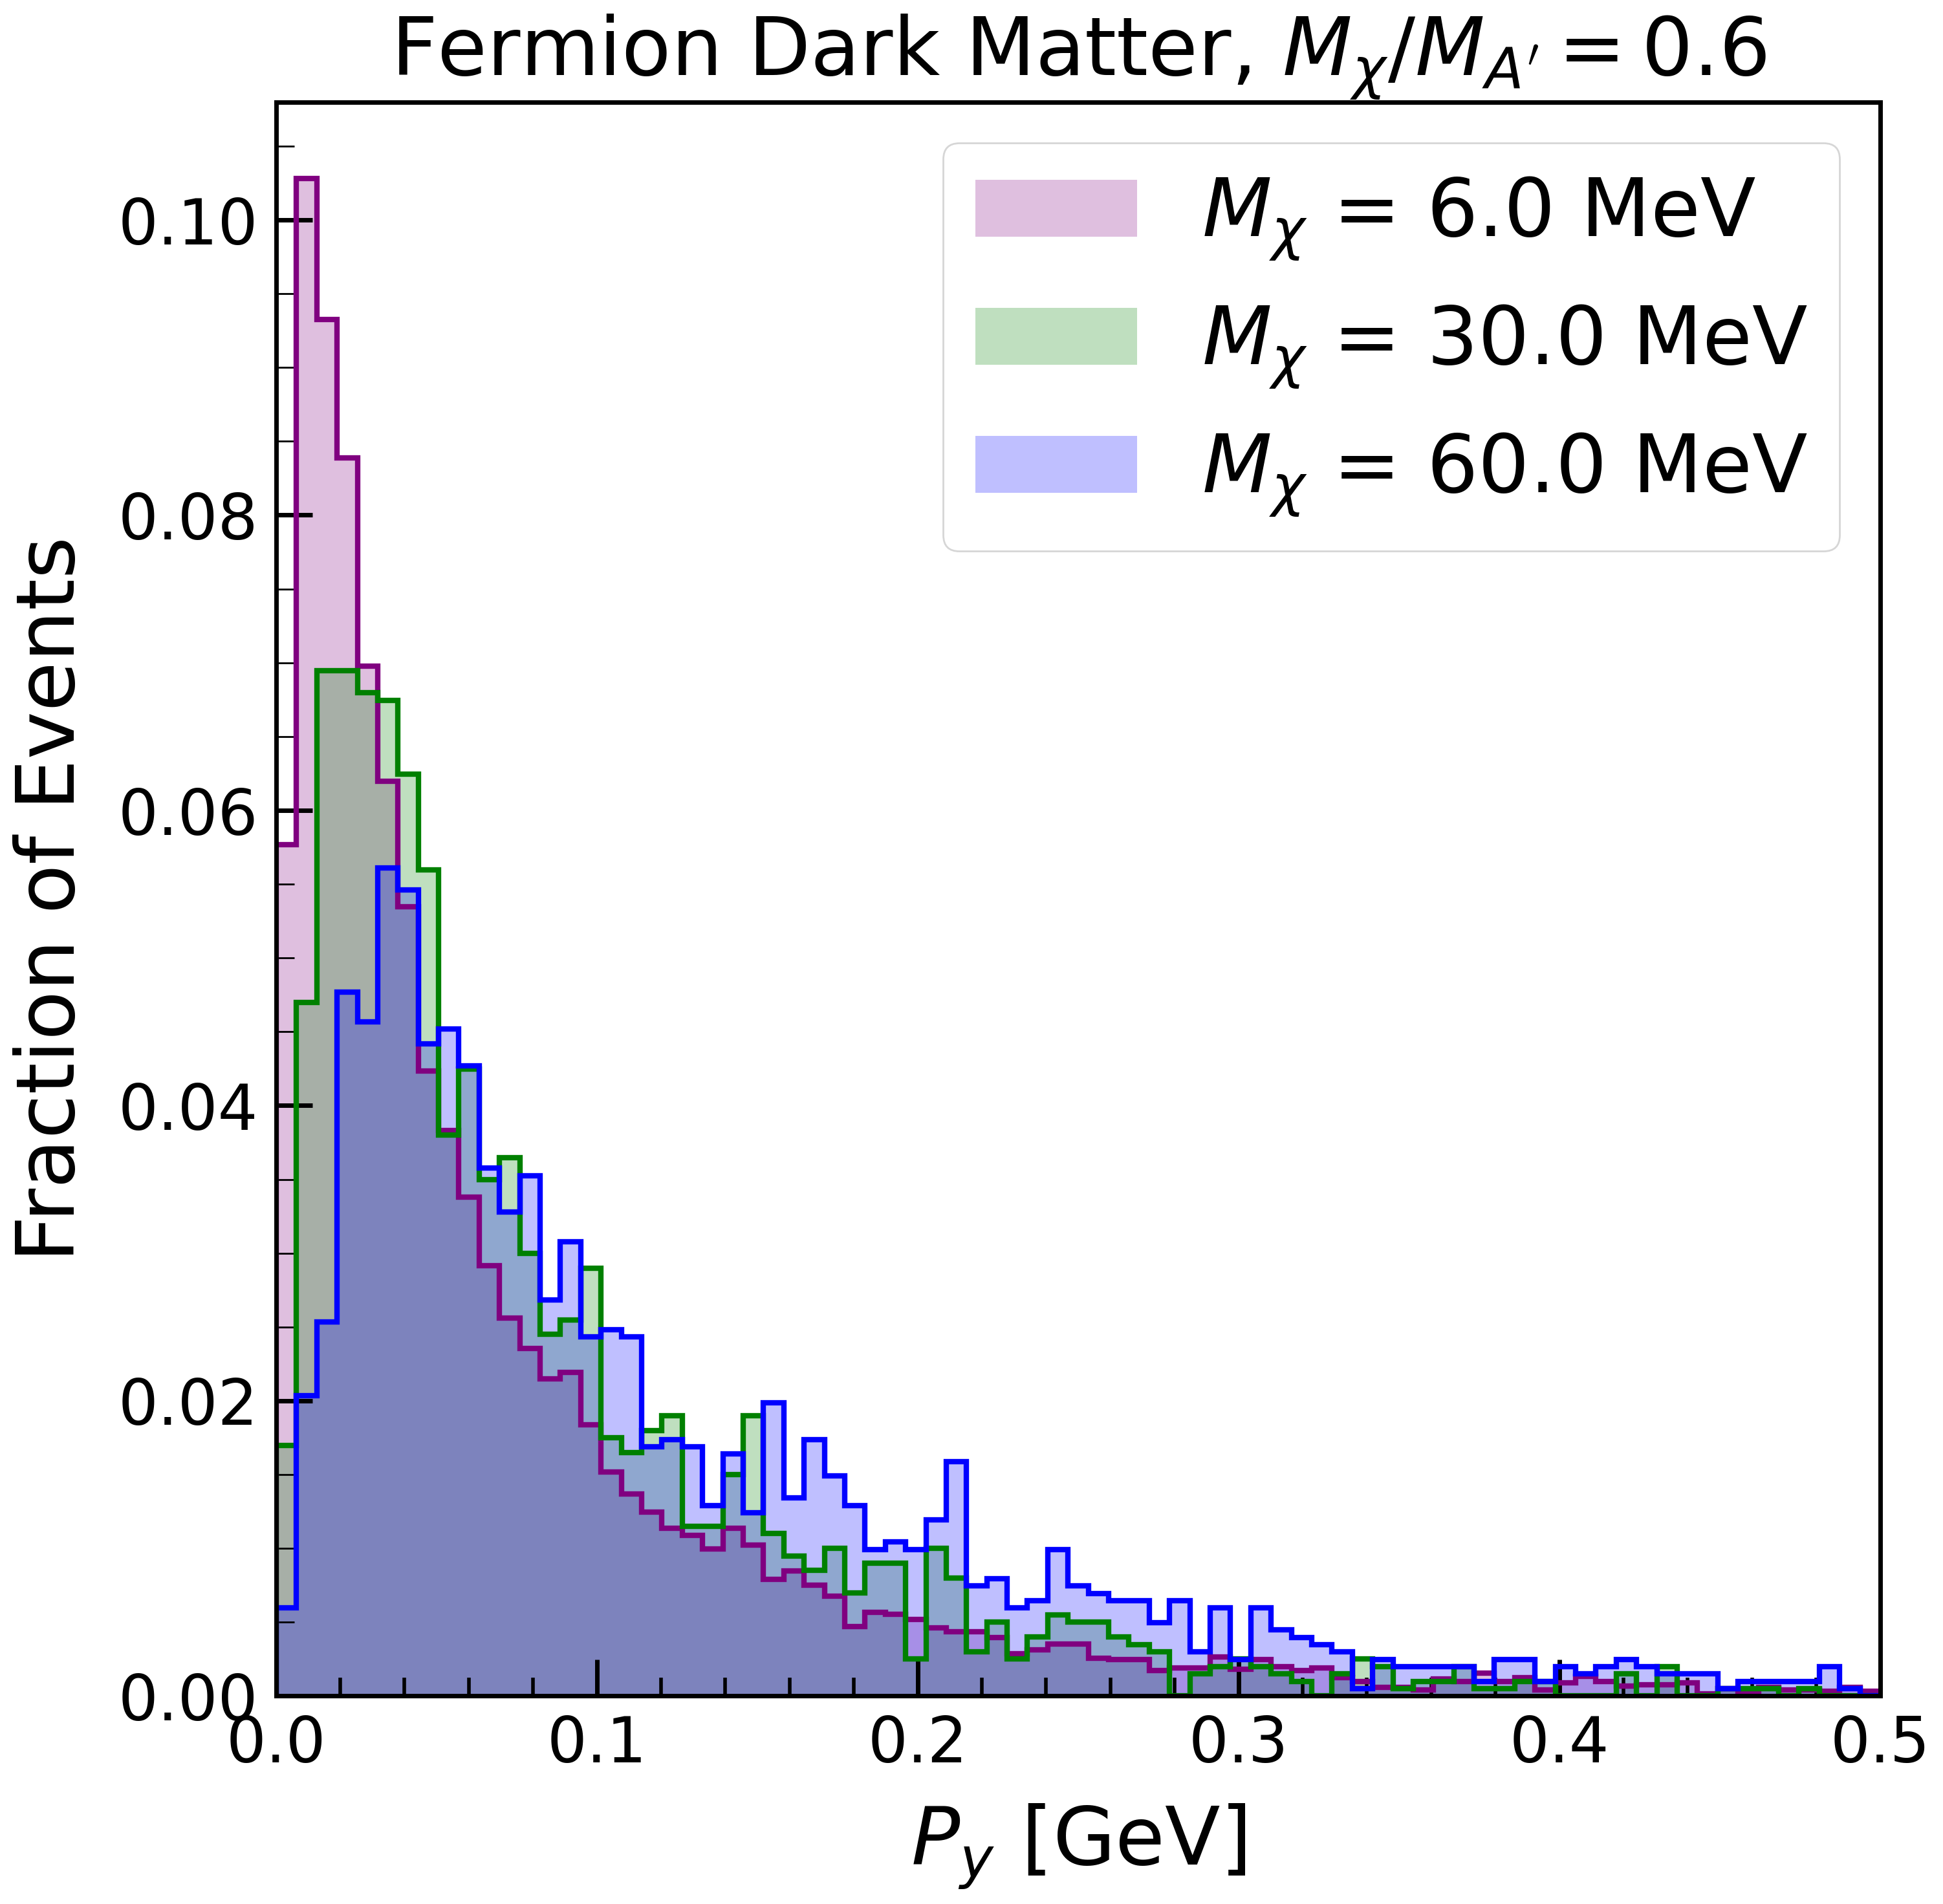

In [21]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    
binning=np.linspace(0.,0.5,80)
    
masses = [0.01, 0.05, 0.1]  
colors = ['purple', 'green', 'blue']
i=0
for m in masses:
    input_file = "events_" + str(m) + "_fermion_0.root"
    input_tree = up3.open(base_dir + input_file)["event_tree"]
    df = input_tree.pandas.df(df_vars, flatten=False)
    (counts, bins) = np.histogram(df['dm_py'],binning)
    plt.hist(bins[:-1],bins=binning,histtype='stepfilled',weights=counts/np.sum(counts),color=colors[i],alpha=0.25,label=r"$M_{\chi}$ = " + str(1000*m*0.6) + " MeV")
    plt.hist(bins[:-1],bins=binning,histtype='step',weights=counts/np.sum(counts),color=colors[i],linewidth=3)
    i+=1
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(fontsize=45)
plt.xlim(0.,0.5)
plt.title(r"Fermion Dark Matter, $M_{\chi}/M_{A'} = 0.6$",fontsize=title_size,pad=text_padding)
plt.xlabel(r'$P_{y}$ [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_dark_matter_py_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "bdnmc_dark_matter_py_ratio_0.6.png", bbox_inches="tight")
plt.show()

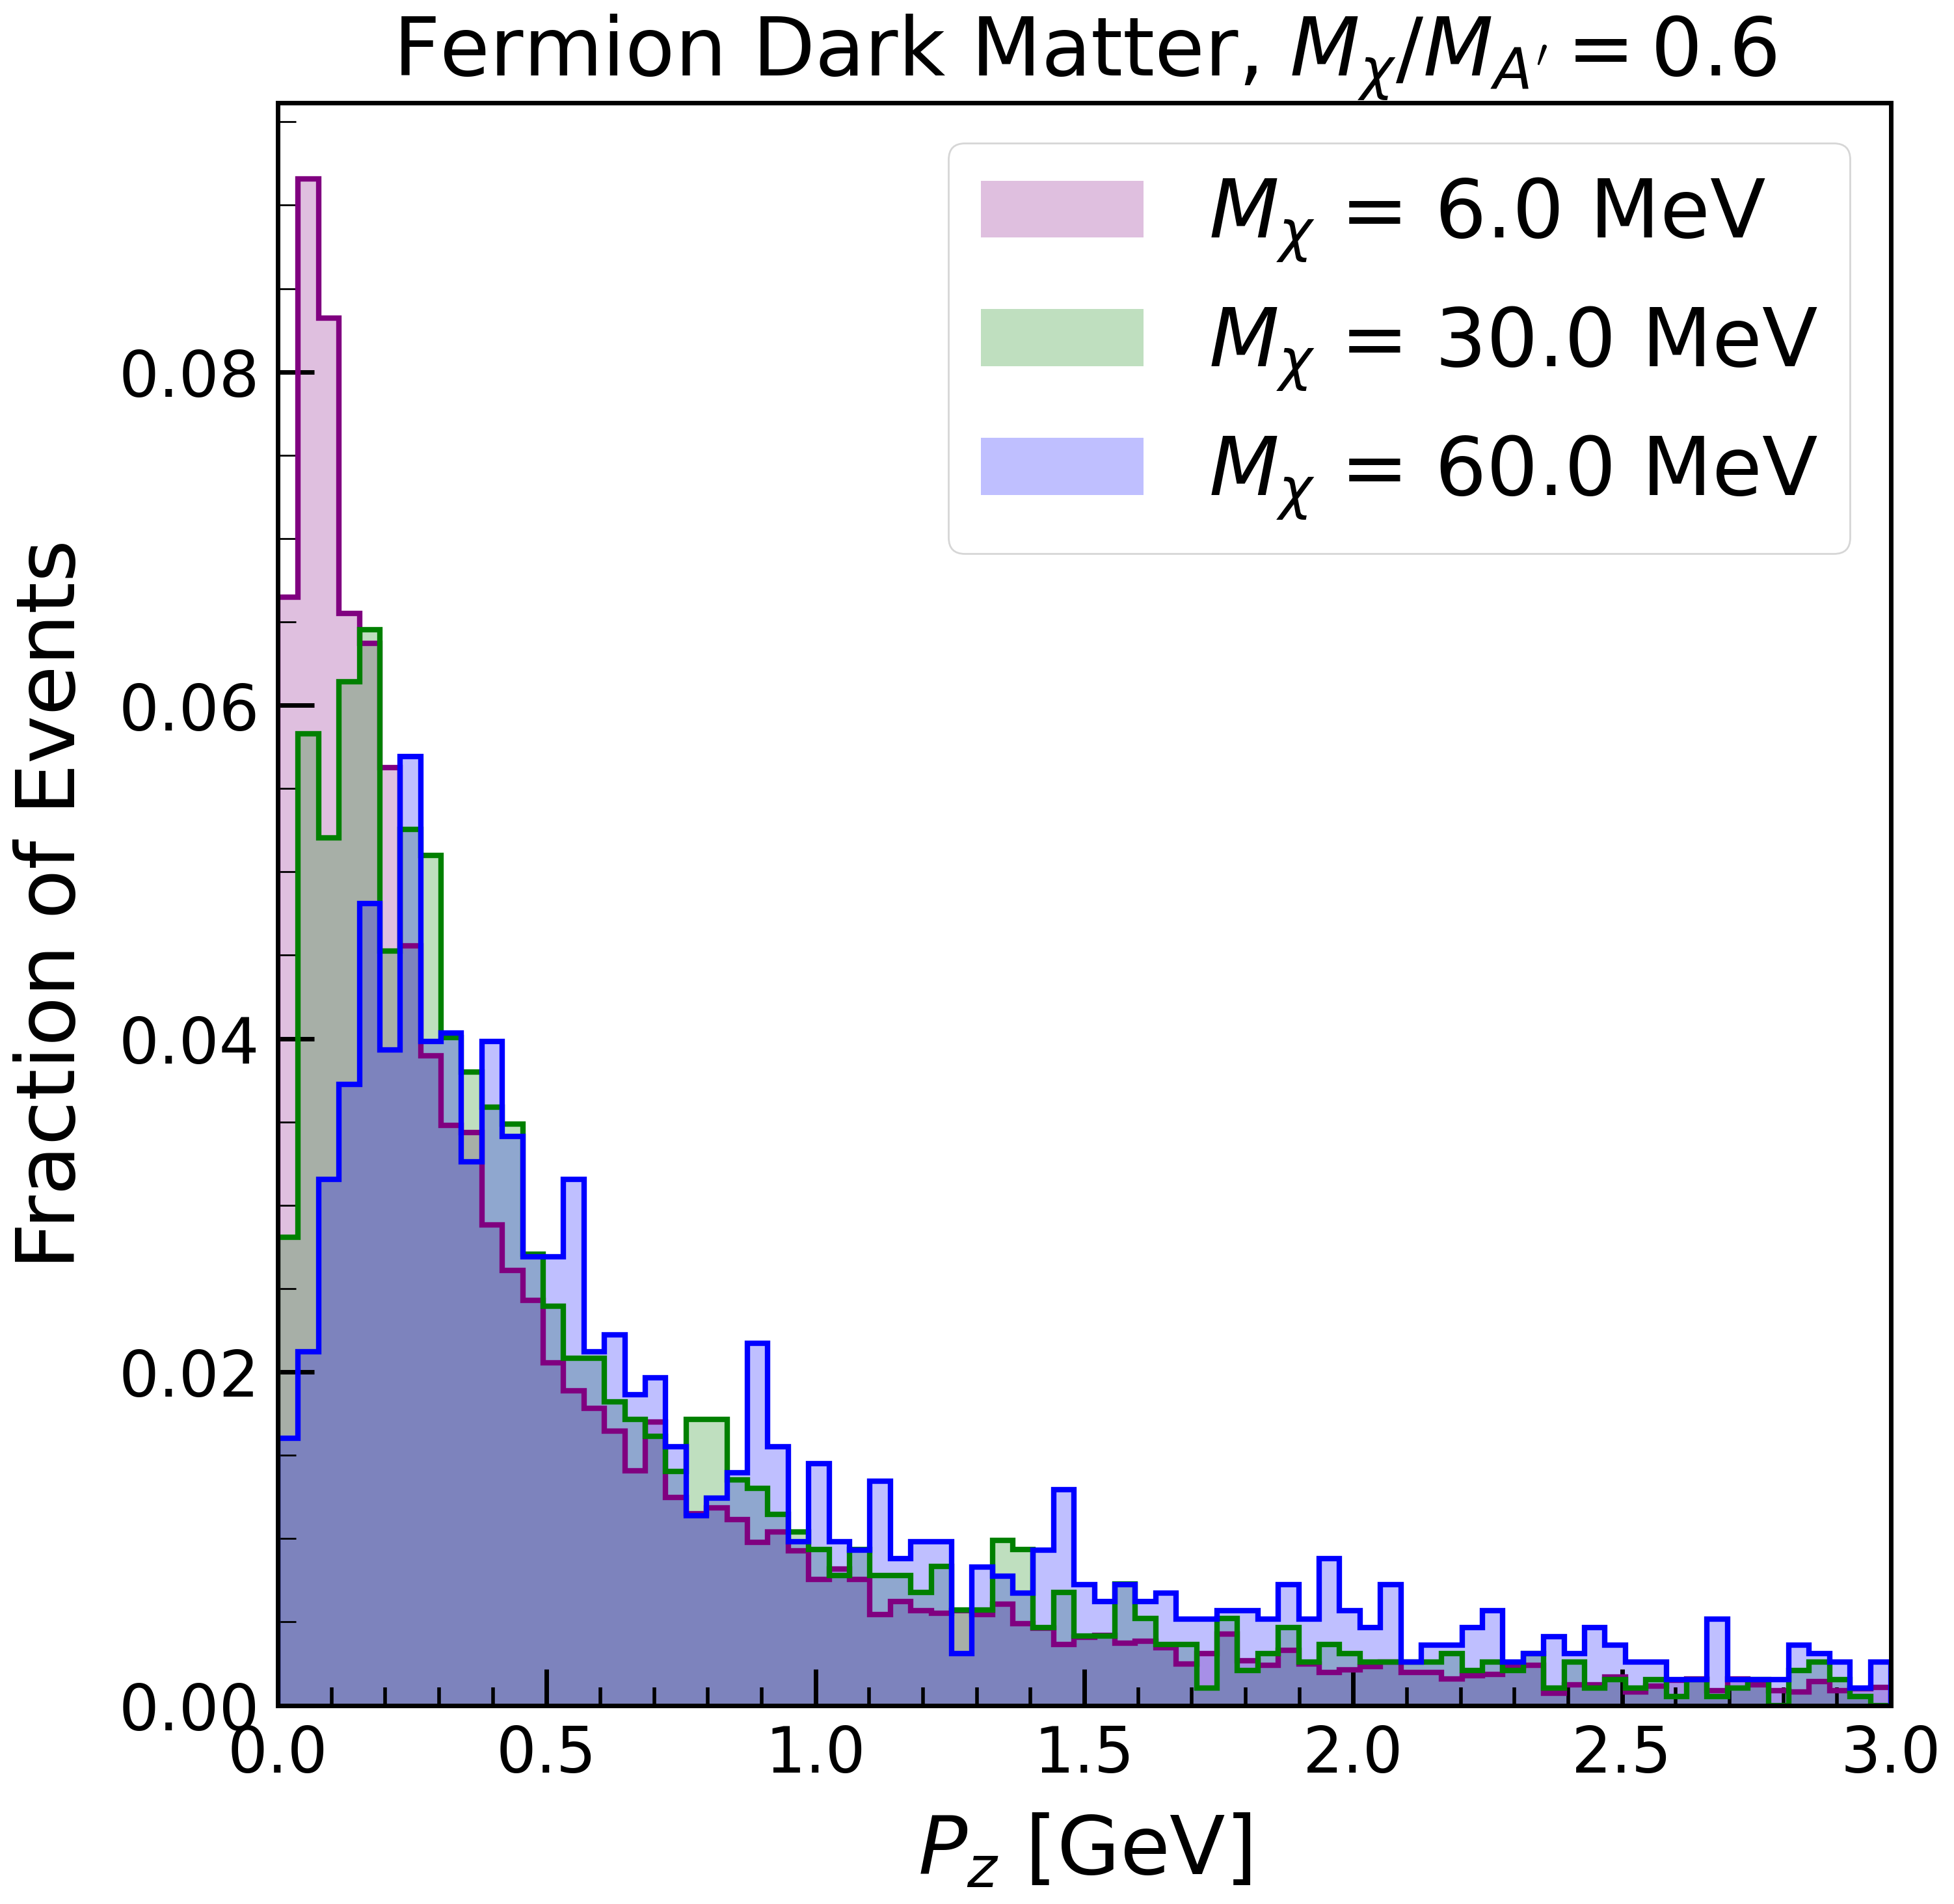

In [23]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
    
binning=np.linspace(0.,3.,80)
    
masses = [0.01, 0.05, 0.1]  
colors = ['purple', 'green', 'blue']
i=0
for m in masses:
    input_file = "events_" + str(m) + "_fermion_0.root"
    input_tree = up3.open(base_dir + input_file)["event_tree"]
    df = input_tree.pandas.df(df_vars, flatten=False)
    (counts, bins) = np.histogram(df['dm_pz'],binning)
    plt.hist(bins[:-1],bins=binning,histtype='stepfilled',weights=counts/np.sum(counts),color=colors[i],alpha=0.25,label=r"$M_{\chi}$ = " + str(1000*m*0.6) + " MeV")
    plt.hist(bins[:-1],bins=binning,histtype='step',weights=counts/np.sum(counts),color=colors[i],linewidth=3)
    i+=1
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(fontsize=45)
plt.xlim(0.,3.)
plt.title(r"Fermion Dark Matter, $M_{\chi}/M_{A'} = 0.6$",fontsize=title_size,pad=text_padding)
plt.xlabel(r'$P_{z}$ [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_dark_matter_pz_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "bdnmc_dark_matter_pz_ratio_0.6.png", bbox_inches="tight")
plt.show()

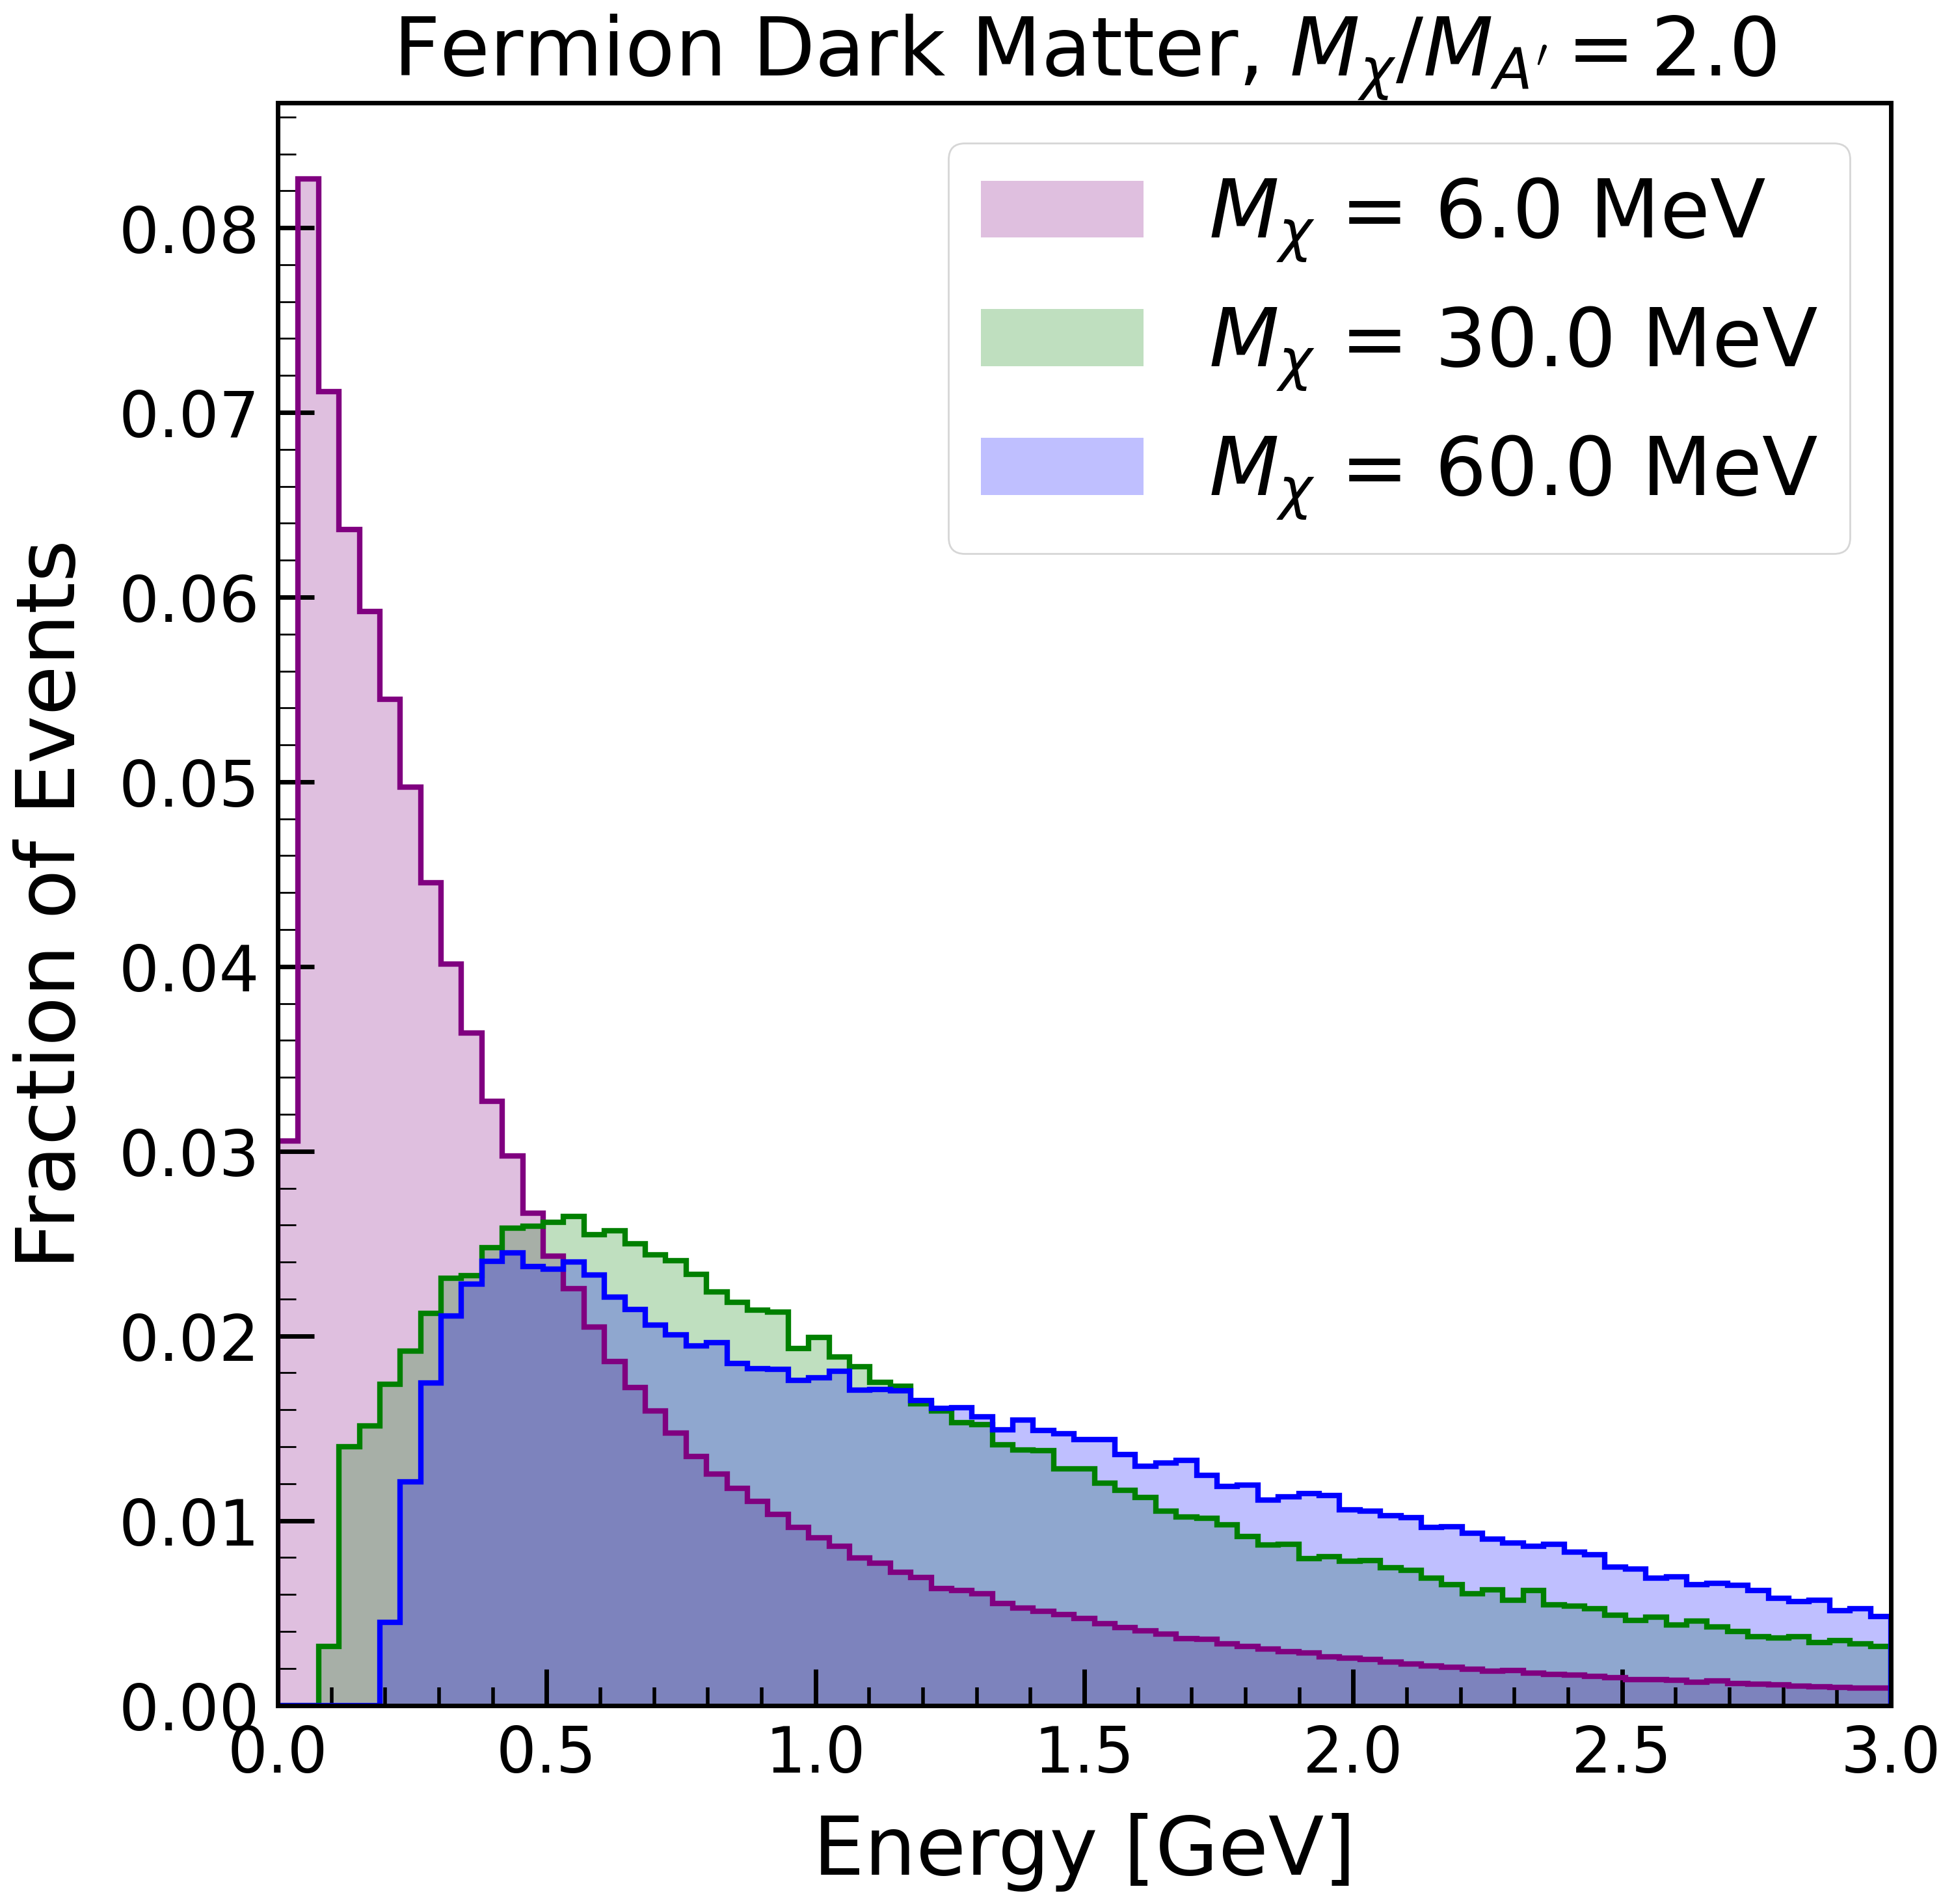

In [9]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

binning=np.linspace(0.,3.,80)
masses = [0.01, 0.05, 0.1]  
colors = ['purple', 'green', 'blue']
i=0
for m in masses:
    input_file = "bdnmc_events_fermion_ratio_2.0_ma_{}.root".format(str(m))
    input_tree = up3.open(base_dir + input_file)["event_tree"]
    df = input_tree.pandas.df(df_vars, flatten=False)
    (counts, bins) = np.histogram(df['dm_energy'],binning)
    plt.hist(bins[:-1],bins=binning,histtype='stepfilled',weights=counts/np.sum(counts),color=colors[i],alpha=0.25,label=r"$M_{\chi}$ = " + str(1000*m*0.6) + " MeV")
    plt.hist(bins[:-1],bins=binning,histtype='step',weights=counts/np.sum(counts),color=colors[i],linewidth=3)
    i+=1
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(fontsize=45)
plt.xticks(size=35)
plt.yticks(size=35)
plt.xlim(0.,3.)
plt.title(r"Fermion Dark Matter, $M_{\chi}/M_{A'} = 2.0$",fontsize=title_size,pad=text_padding)
plt.xlabel(r'Energy [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_dark_matter_flux_ratio_2.0.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "bdnmc_dark_matter_flux_ratio_2.0.png", bbox_inches="tight")
plt.show()

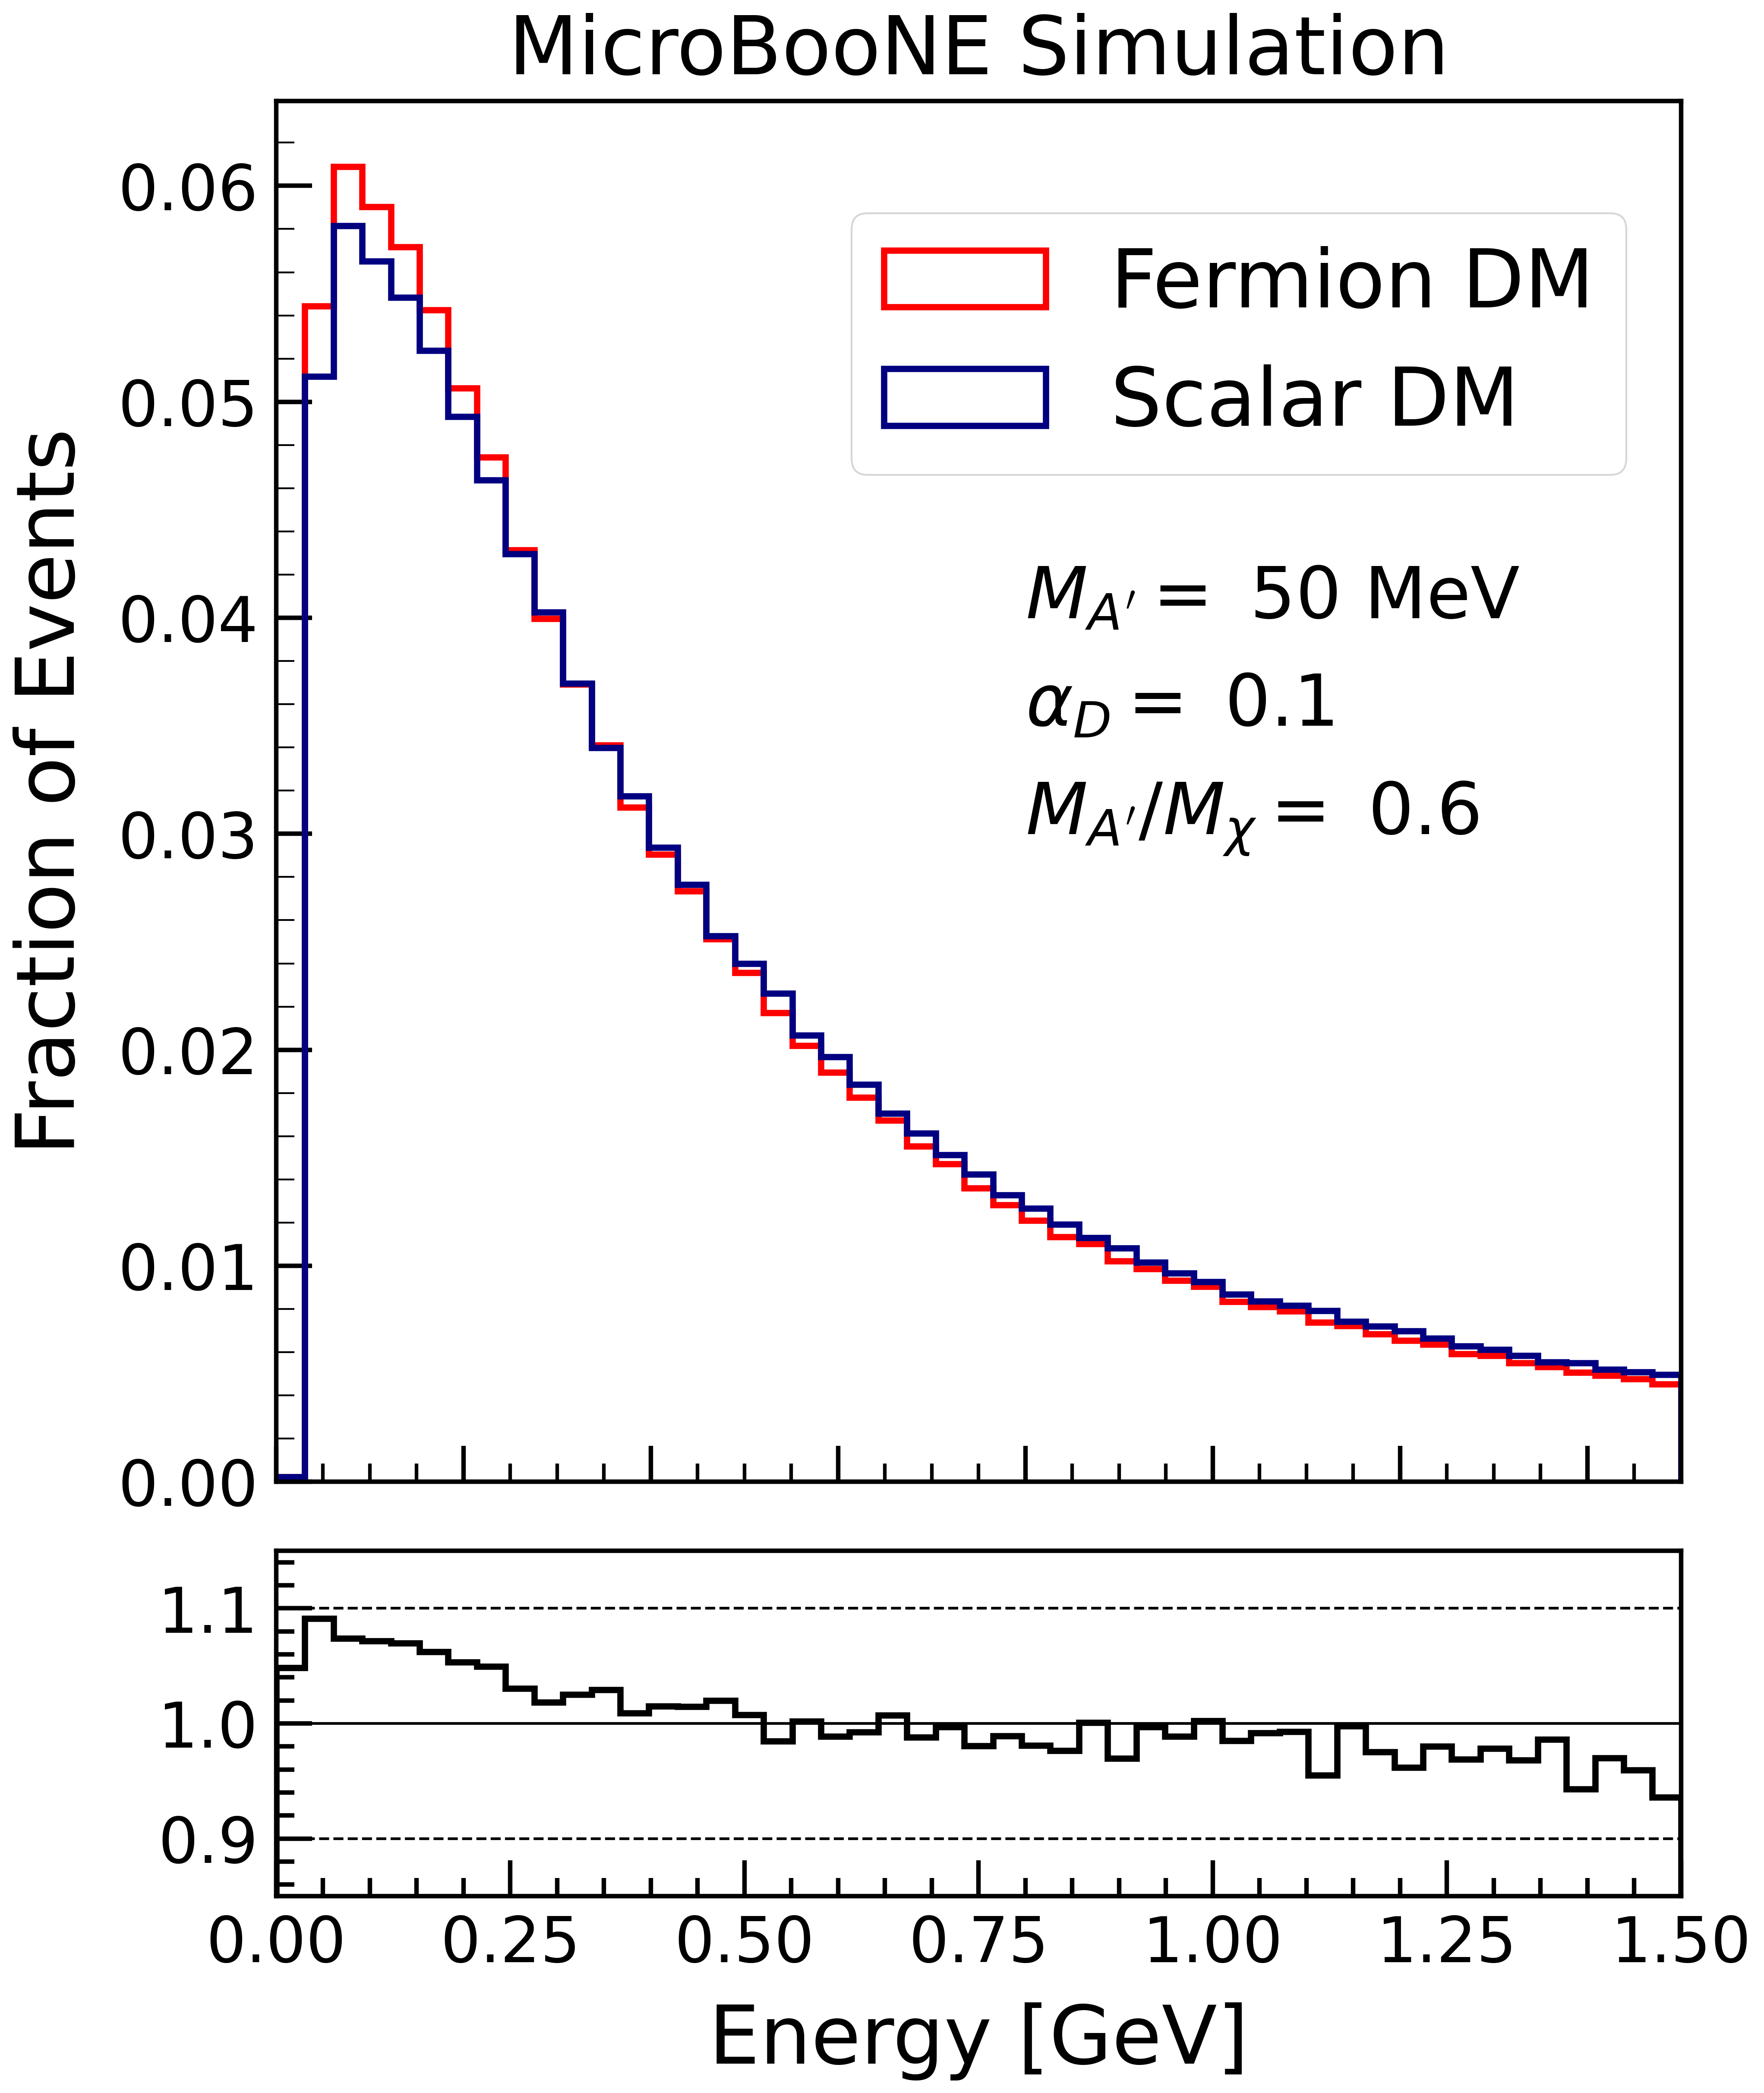

In [26]:
alpha_val = 0.1
ratio_val = 0.6
mass_val = 0.05

from matplotlib.ticker import MultipleLocator
upper_limit = 1.5
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz','parent_energy']

fig, ax = plt.subplots(2,1,figsize=figure_size,dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())

binning=np.linspace(0.,upper_limit,50)

variable='dm_energy'
input_file = "bdnmc_fermion_events_pi0_decay_ratio_0.6_ma_{:.2f}.root".format(mass_val)
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)

(counts_fermion,bins_fermion) = np.histogram(df[variable],bins=binning)
ax[0].hist(bins_fermion[:-1],bins=bins_fermion,weights=counts_fermion/np.sum(counts_fermion),histtype='step',color="red",lw=3.5,label=r"Fermion DM")


input_file = "bdnmc_scalar_events_pi0_decay_ratio_0.6_ma_{:.2f}.root".format(mass_val)
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)
(counts_scalar,bins_scalar) = np.histogram(df[variable],bins=binning)
ax[0].hist(bins_scalar[:-1],bins=bins_scalar,weights=counts_scalar/np.sum(counts_scalar),histtype='step',color="navy",lw=3.5,label=r"Scalar DM")

ax[1].hist(bins_scalar[:-1],bins=bins_scalar,weights=counts_fermion/counts_scalar,lw=3.5,histtype='step',color='black')

ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].legend(fontsize=45,loc='lower right', bbox_to_anchor=[0.99,0.7])
ax[0].set_xlim(0.,upper_limit)
ax[1].set_xlim(0.,upper_limit)
ax[1].hlines(1.0,0.,upper_limit,color='black',linewidth=1.5)
ax[1].hlines(0.9,0.,upper_limit,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(1.1,0.,upper_limit,color='black',linestyle="--",linewidth=1.5)
ax[1].set_ylim(0.85,1.15)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5,pad=10, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5,pad=10, labelsize=35)
ax[1].set_yticks([0.9,1.0,1.1])

title_string = "MicroBooNE Simulation"

ax[0].text(0.8,0.040,r"$M_{{A^\prime}} =$ {} MeV".format(int(mass_val*1000)),fontsize=40)
ax[0].text(0.8,0.035,r"$\alpha_{{D}} =$ {:.1f}".format(alpha_val),fontsize=40)
ax[0].text(0.8,0.030,r"$M_{{A^\prime}}/M_{{\chi}} =$ {:.1f}".format(ratio_val),fontsize=40)

ax[0].set_title(title_string,fontsize=title_size,pad=text_padding)
ax[1].set_xlabel(r'Energy [GeV]',fontsize=axis_label_size,labelpad=text_padding)
ax[0].set_ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
fig_string_pdf = "bdnmc_fermion_scalar_dm_ma_{:.2f}_comparison.pdf".format(mass_val)
fig_string_png = "bdnmc_fermion_scalar_dm_ma_{:.2f}_comparison.png".format(mass_val)
plt.savefig(figs_dir + fig_string_pdf, bbox_inches="tight")
plt.savefig(figs_dir + fig_string_png, bbox_inches="tight")
plt.show()


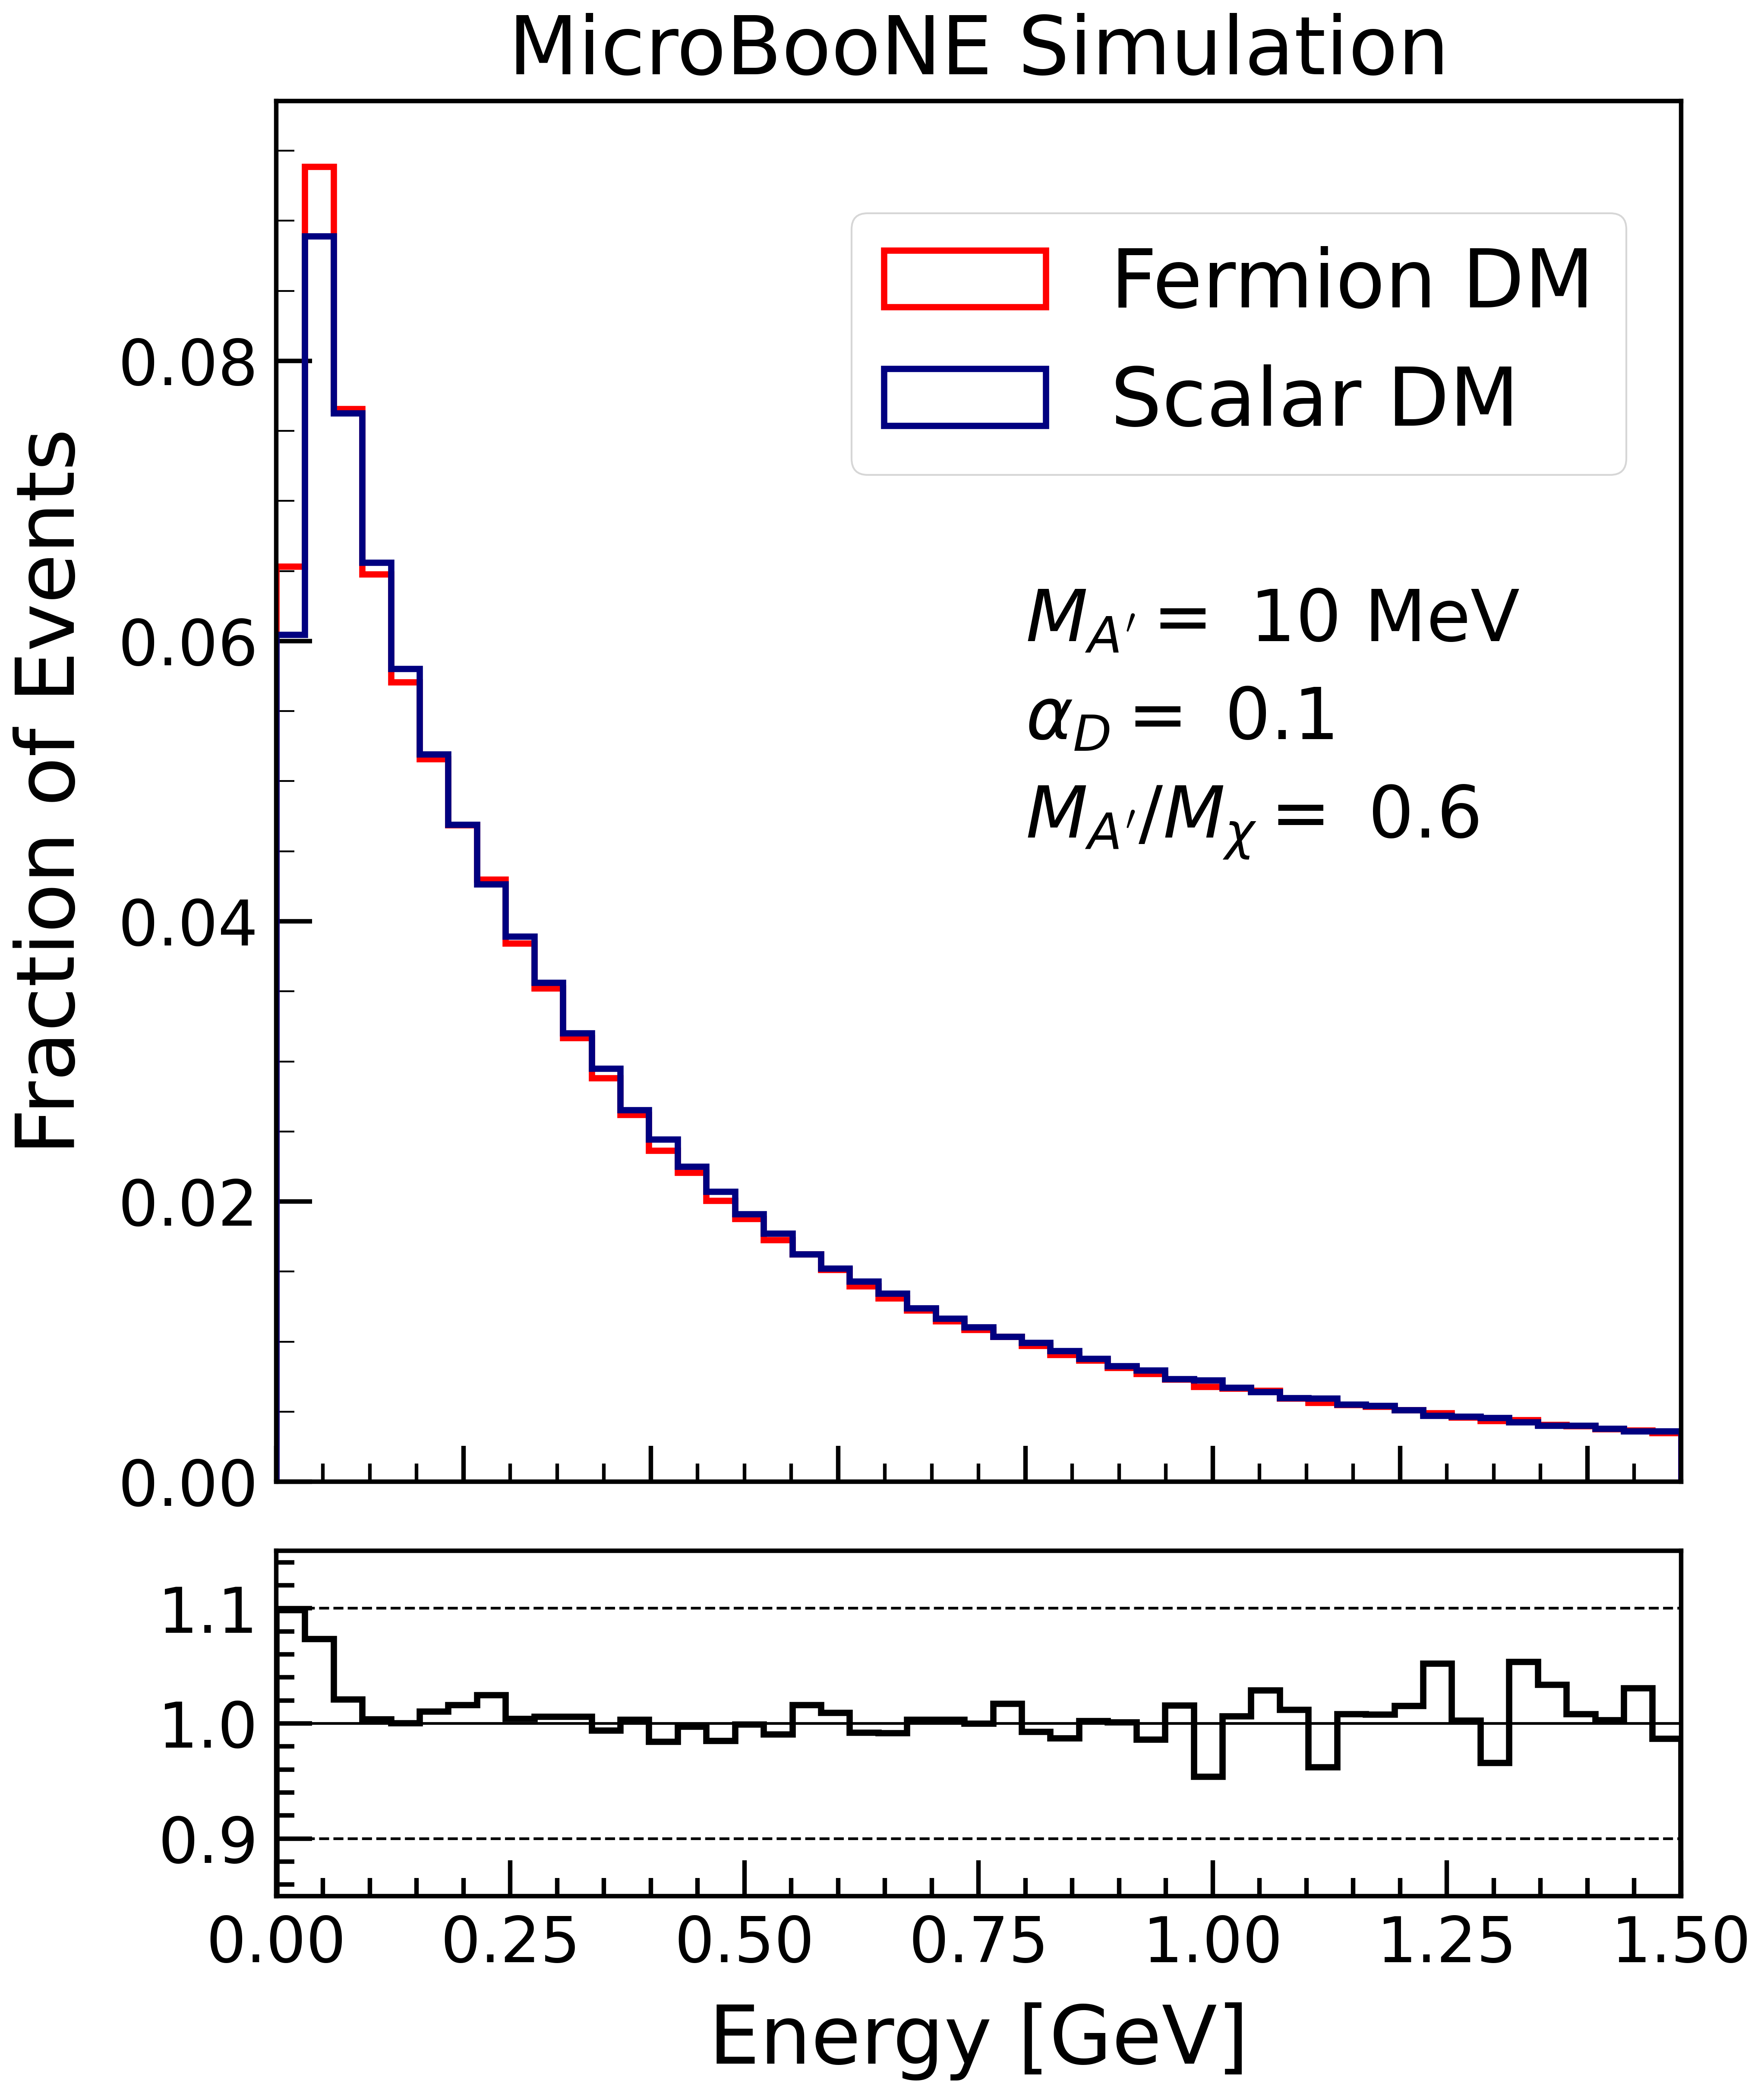

In [22]:
alpha_val = 0.1
ratio_val = 0.6
mass_val = 0.01

from matplotlib.ticker import MultipleLocator
upper_limit = 1.5
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz','parent_energy']

fig, ax = plt.subplots(2,1,figsize=figure_size,dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())

binning=np.linspace(0.,upper_limit,50)

variable='dm_energy'
input_file = "bdnmc_fermion_events_pi0_decay_ratio_0.6_ma_{:.2f}.root".format(mass_val)
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)

(counts_fermion,bins_fermion) = np.histogram(df[variable],bins=binning)
ax[0].hist(bins_fermion[:-1],bins=bins_fermion,weights=counts_fermion/np.sum(counts_fermion),histtype='step',color="red",lw=3.5,label=r"Fermion DM")


input_file = "bdnmc_scalar_events_pi0_decay_ratio_0.6_ma_{:.2f}.root".format(mass_val)
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)
(counts_scalar,bins_scalar) = np.histogram(df[variable],bins=binning)
ax[0].hist(bins_scalar[:-1],bins=bins_scalar,weights=counts_scalar/np.sum(counts_scalar),histtype='step',color="navy",lw=3.5,label=r"Scalar DM")

ax[1].hist(bins_scalar[:-1],bins=bins_scalar,weights=counts_fermion/counts_scalar,lw=3.5,histtype='step',color='black')

ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].legend(fontsize=45,loc='lower right', bbox_to_anchor=[0.99,0.7])
ax[0].set_xlim(0.,upper_limit)
ax[1].set_xlim(0.,upper_limit)
ax[1].hlines(1.0,0.,upper_limit,color='black',linewidth=1.5)
ax[1].hlines(0.9,0.,upper_limit,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(1.1,0.,upper_limit,color='black',linestyle="--",linewidth=1.5)
ax[1].set_ylim(0.85,1.15)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5,pad=10, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5,pad=10, labelsize=35)
ax[1].set_yticks([0.9,1.0,1.1])

title_string = "MicroBooNE Simulation"

ax[0].text(0.8,0.060,r"$M_{{A^\prime}} =$ {} MeV".format(int(mass_val*1000)),fontsize=40)
ax[0].text(0.8,0.053,r"$\alpha_{{D}} =$ {:.1f}".format(alpha_val),fontsize=40)
ax[0].text(0.8,0.046,r"$M_{{A^\prime}}/M_{{\chi}} =$ {:.1f}".format(ratio_val),fontsize=40)

ax[0].set_title(title_string,fontsize=title_size,pad=text_padding)
ax[1].set_xlabel(r'Energy [GeV]',fontsize=axis_label_size,labelpad=text_padding)
ax[0].set_ylabel("Fraction of Events",fontsize=axis_label_size, labelpad=text_padding)
fig_string_pdf = "bdnmc_fermion_scalar_dm_ma_{:.2f}_comparison.pdf".format(mass_val)
fig_string_png = "bdnmc_fermion_scalar_dm_ma_{:.2f}_comparison.png".format(mass_val)
plt.savefig(figs_dir + fig_string_pdf, bbox_inches="tight")
plt.savefig(figs_dir + fig_string_png, bbox_inches="tight")
plt.show()

# BdNMC mass ratio check

       dm_energy     dm_px     dm_py     dm_pz  parent_energy
entry                                                        
0       2.499946  0.206643  0.262856  2.475467       6.055363
1       1.110416  0.087101  0.116957  1.096247       6.743871
2       1.739328  0.143128  0.184339  1.720696       7.918714
3       0.723387  0.079870  0.108320  0.703688       1.447058
4       0.286432  0.020583  0.028391  0.266108       1.156955


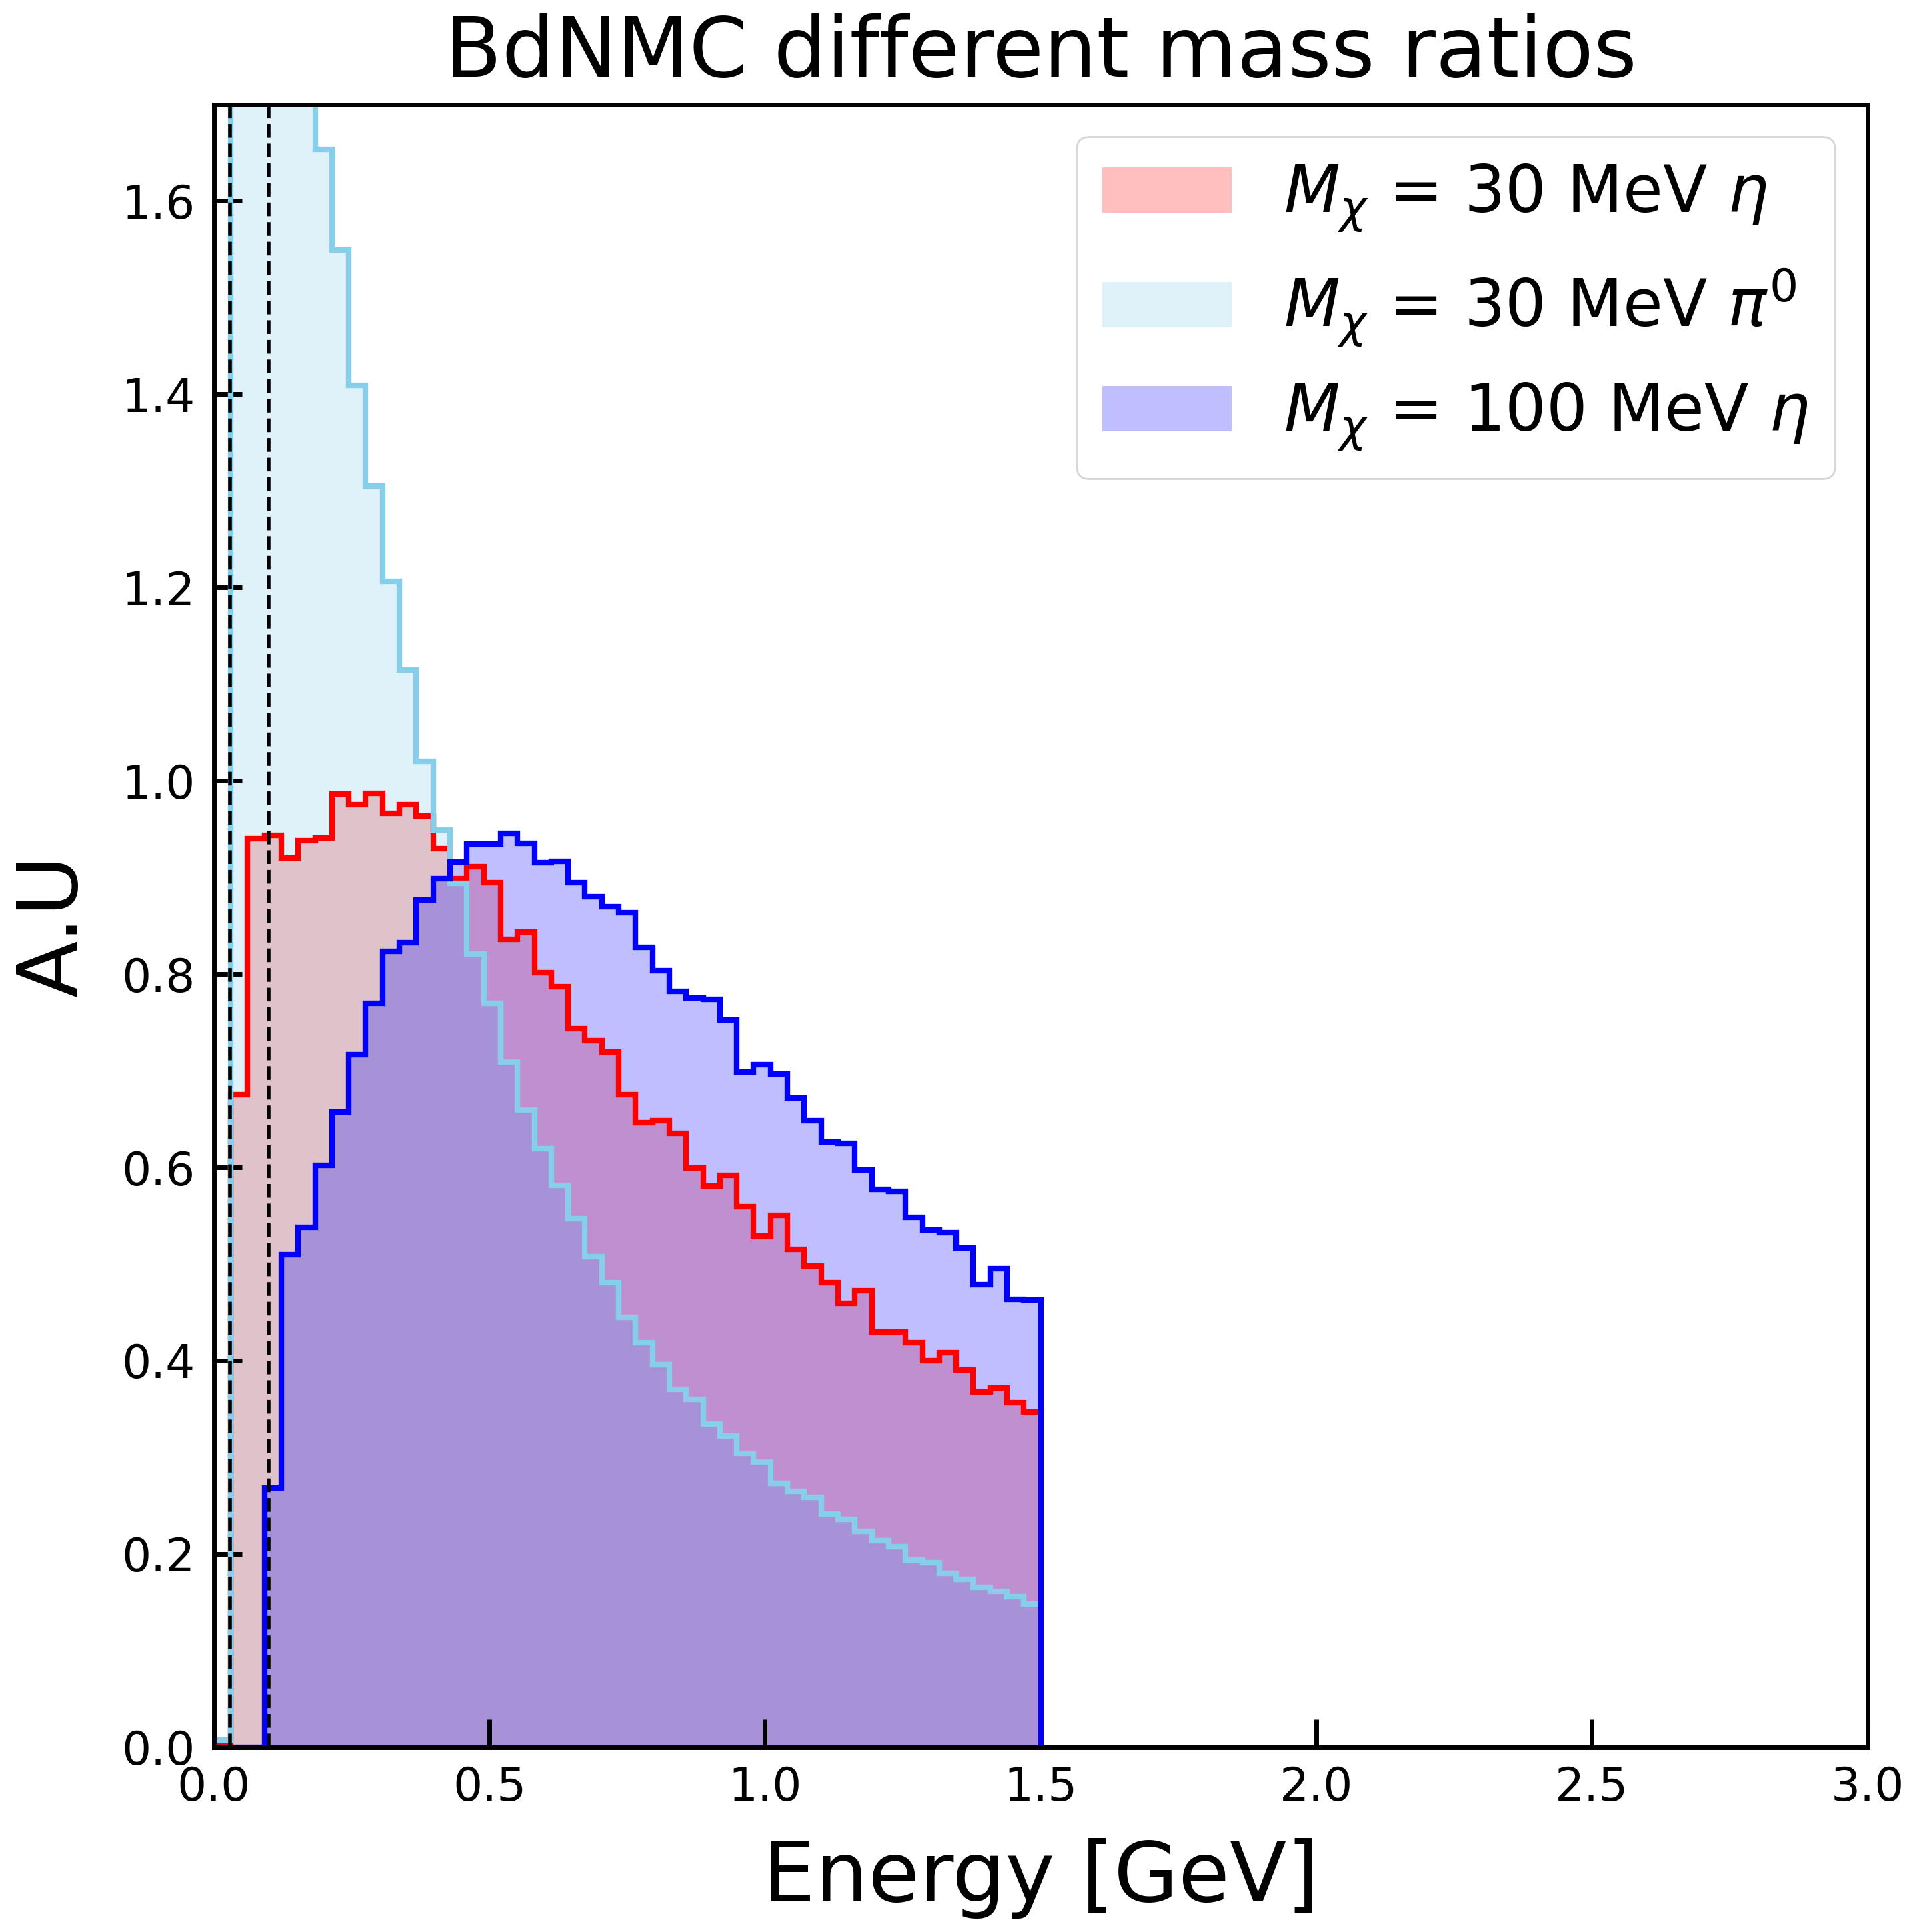

In [12]:
df_vars = ['dm_energy', 'dm_px', 'dm_py', 'dm_pz','parent_energy']
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

variable='dm_energy'
input_file = "bdnmc_events_eta_decay_ratio_0.6_ma_0.05.root"
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)
plt.hist(df[variable],bins=binning,histtype='stepfilled',color="red",density=True,alpha=0.25,label=r"$M_{\chi}$ = 30 MeV $\eta$")
plt.hist(df[variable],bins=binning,histtype='step',color="red",linewidth=3,density=True)

input_file = "bdnmc_fermion_events_pi0_decay_ratio_0.6_ma_0.05.root"
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)
plt.hist(df[variable],bins=binning,histtype='stepfilled',color="skyblue",density=True,alpha=0.25,label=r"$M_{\chi}$ = 30 MeV $\pi^{0}$")
plt.hist(df[variable],bins=binning,histtype='step',color="skyblue",linewidth=3,density=True)

input_file = "bdnmc_events_eta_decay_ratio_2.0_ma_0.05.root"
input_tree = up3.open(base_dir + input_file)["event_tree"]
df = input_tree.pandas.df(df_vars, flatten=False)
print(df.head())
plt.hist(df[variable],bins=binning,histtype='stepfilled',color="blue",density=True,alpha=0.25,label=r"$M_{\chi}$ = 100 MeV $\eta$")
plt.hist(df[variable],bins=binning,histtype='step',color="blue",linewidth=3,density=True)


    
plt.tick_params(axis="y", which='major', direction="in",length=15,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=15,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=15,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=15,width=2.0,labelbottom=False)
plt.legend(fontsize=35)
plt.xticks(size=25)
plt.yticks(size=25)
plt.vlines(0.03,0.,1.7,linestyle='--',lw=2.0,color='black')
plt.vlines(0.1,0.,1.7,linestyle='--',lw=2.0,color='black')
plt.xlim(0.,3.)
plt.ylim(0.,1.7)
plt.title(r"BdNMC different mass ratios",fontsize=title_size,pad=text_padding)
plt.xlabel(r'Energy [GeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("A.U",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "bdnmc_different_mass_ratio_comparison.png")
plt.show()

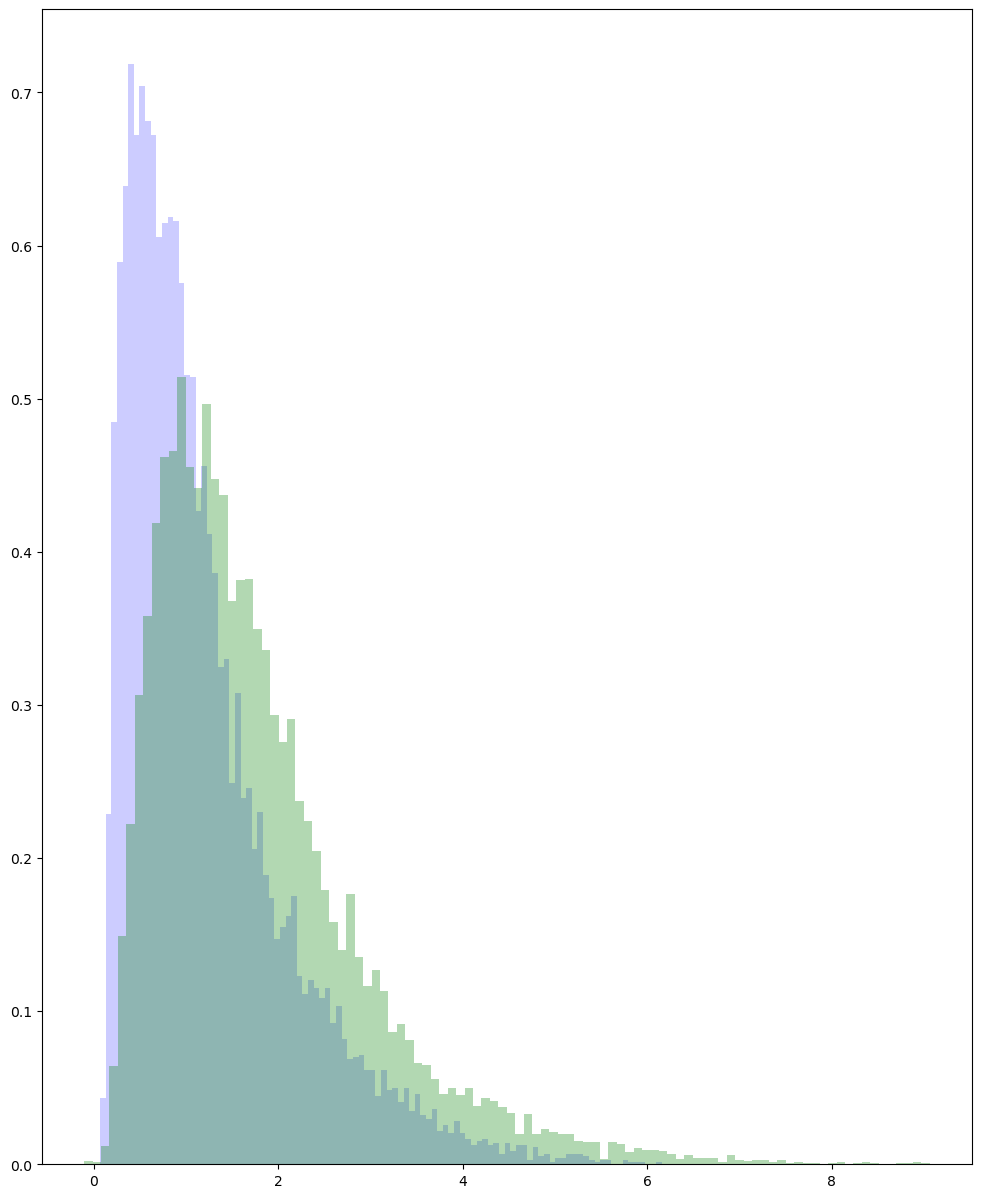

In [13]:
vertex_vars = ["mctruth_daughters_pdg", "mctruth_daughters_E", "mctruth_daughters_px", "mctruth_daughters_py",
               "mctruth_daughters_pz","mctruth_daughters_startx","mctruth_daughters_starty",
               "mctruth_daughters_startz","mctruth_daughters_time"]

input_file = base_dir + "run1_dt_ratio_0.6_ma_0.05_pi0_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df_a = input_tree.pandas.df(vertex_vars, flatten=False)

input_file = base_dir + "run1_dt_ratio_0.6_ma_0.05_eta_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df_b = input_tree.pandas.df(vertex_vars, flatten=False)

input_file = base_dir + "run1_dt_ratio_2.0_ma_0.05_eta_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df_c = input_tree.pandas.df(vertex_vars, flatten=False)

df_arr = [df_a, df_b, df_c]
energy_arr = [np.array([]), np.array([]), np.array([])]
set_counter=0
for df in df_arr:
    for i in range(len(df)):
        energy_arr[set_counter] = np.append(energy_arr[set_counter],df['mctruth_daughters_pz'][i][0])
    set_counter+=1
    
plt.figure(figsize=(12,15))   
plt.hist(energy_arr[0],bins=100,alpha=0.2,color='blue',density=True)
#plt.hist(energy_arr[1],bins=100,alpha=0.2,color='red',density=True)
plt.hist(energy_arr[2],bins=100,alpha=0.3,color='green',density=True)
plt.show()

In [14]:
min_energy = np.array([])
max_energy = np.array([])
e_px = np.array([])
p_px = np.array([])
e_py = np.array([])
p_py = np.array([])
e_pz = np.array([])
p_pz = np.array([])
v_x = np.array([])
v_y = np.array([])
v_z = np.array([])
v_t = np.array([])
invariant_mass = np.array([])




vertex_vars = ["mctruth_daughters_pdg", "mctruth_daughters_E", "mctruth_daughters_px", "mctruth_daughters_py",
               "mctruth_daughters_pz","mctruth_daughters_startx","mctruth_daughters_starty",
               "mctruth_daughters_startz","mctruth_daughters_time"]

input_file = base_dir + "run1_dt_ratio_0.6_ma_0.05_pi0_sp.root"
#input_file = base_dir + "run3_dt_ratio_0.6_ma_0.05_pi0_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df = input_tree.pandas.df(vertex_vars, flatten=False)
df.head()


for i in range(len(df)):
        this_row= df.iloc[i]
        e_px = np.append(e_px,this_row['mctruth_daughters_px'][3])
        e_py = np.append(e_py,this_row['mctruth_daughters_py'][3])
        e_pz = np.append(e_pz,this_row['mctruth_daughters_pz'][3])
        p_px = np.append(p_px,this_row['mctruth_daughters_px'][2])
        p_py = np.append(p_py,this_row['mctruth_daughters_py'][2])
        p_pz = np.append(p_pz,this_row['mctruth_daughters_pz'][2])
        v_x = np.append(v_x,this_row['mctruth_daughters_startx'][2])
        v_y = np.append(v_y,this_row['mctruth_daughters_starty'][2])
        v_z = np.append(v_z,this_row['mctruth_daughters_startz'][2])
        v_t = np.append(v_t,this_row['mctruth_daughters_time'][2])
        temp_min_energy = np.minimum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        temp_max_energy = np.maximum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        min_energy = np.append(min_energy,temp_min_energy)
        max_energy = np.append(max_energy,temp_max_energy)
        e_p = np.sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)
        p_p = np.sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)
        op_angle = (e_px*p_px + e_py*p_py + e_pz*p_pz)/(e_p*p_p)
        op_angle = np.arccos(op_angle)


input_file = base_dir + "run1_dt_ratio_0.6_ma_0.05_eta_sp.root"
#input_file = base_dir + "run3_dt_ratio_0.6_ma_0.05_pi0_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df = input_tree.pandas.df(vertex_vars, flatten=False)


for i in range(len(df)):
        this_row= df.iloc[i]
        e_px = np.append(e_px,this_row['mctruth_daughters_px'][3])
        e_py = np.append(e_py,this_row['mctruth_daughters_py'][3])
        e_pz = np.append(e_pz,this_row['mctruth_daughters_pz'][3])
        p_px = np.append(p_px,this_row['mctruth_daughters_px'][2])
        p_py = np.append(p_py,this_row['mctruth_daughters_py'][2])
        p_pz = np.append(p_pz,this_row['mctruth_daughters_pz'][2])
        v_x = np.append(v_x,this_row['mctruth_daughters_startx'][2])
        v_y = np.append(v_y,this_row['mctruth_daughters_starty'][2])
        v_z = np.append(v_z,this_row['mctruth_daughters_startz'][2])
        v_t = np.append(v_t,this_row['mctruth_daughters_time'][2])
        temp_min_energy = np.minimum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        temp_max_energy = np.maximum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        min_energy = np.append(min_energy,temp_min_energy)
        max_energy = np.append(max_energy,temp_max_energy)
        e_p = np.sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)
        p_p = np.sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)
        op_angle = (e_px*p_px + e_py*p_py + e_pz*p_pz)/(e_p*p_p)
        op_angle = np.arccos(op_angle) 

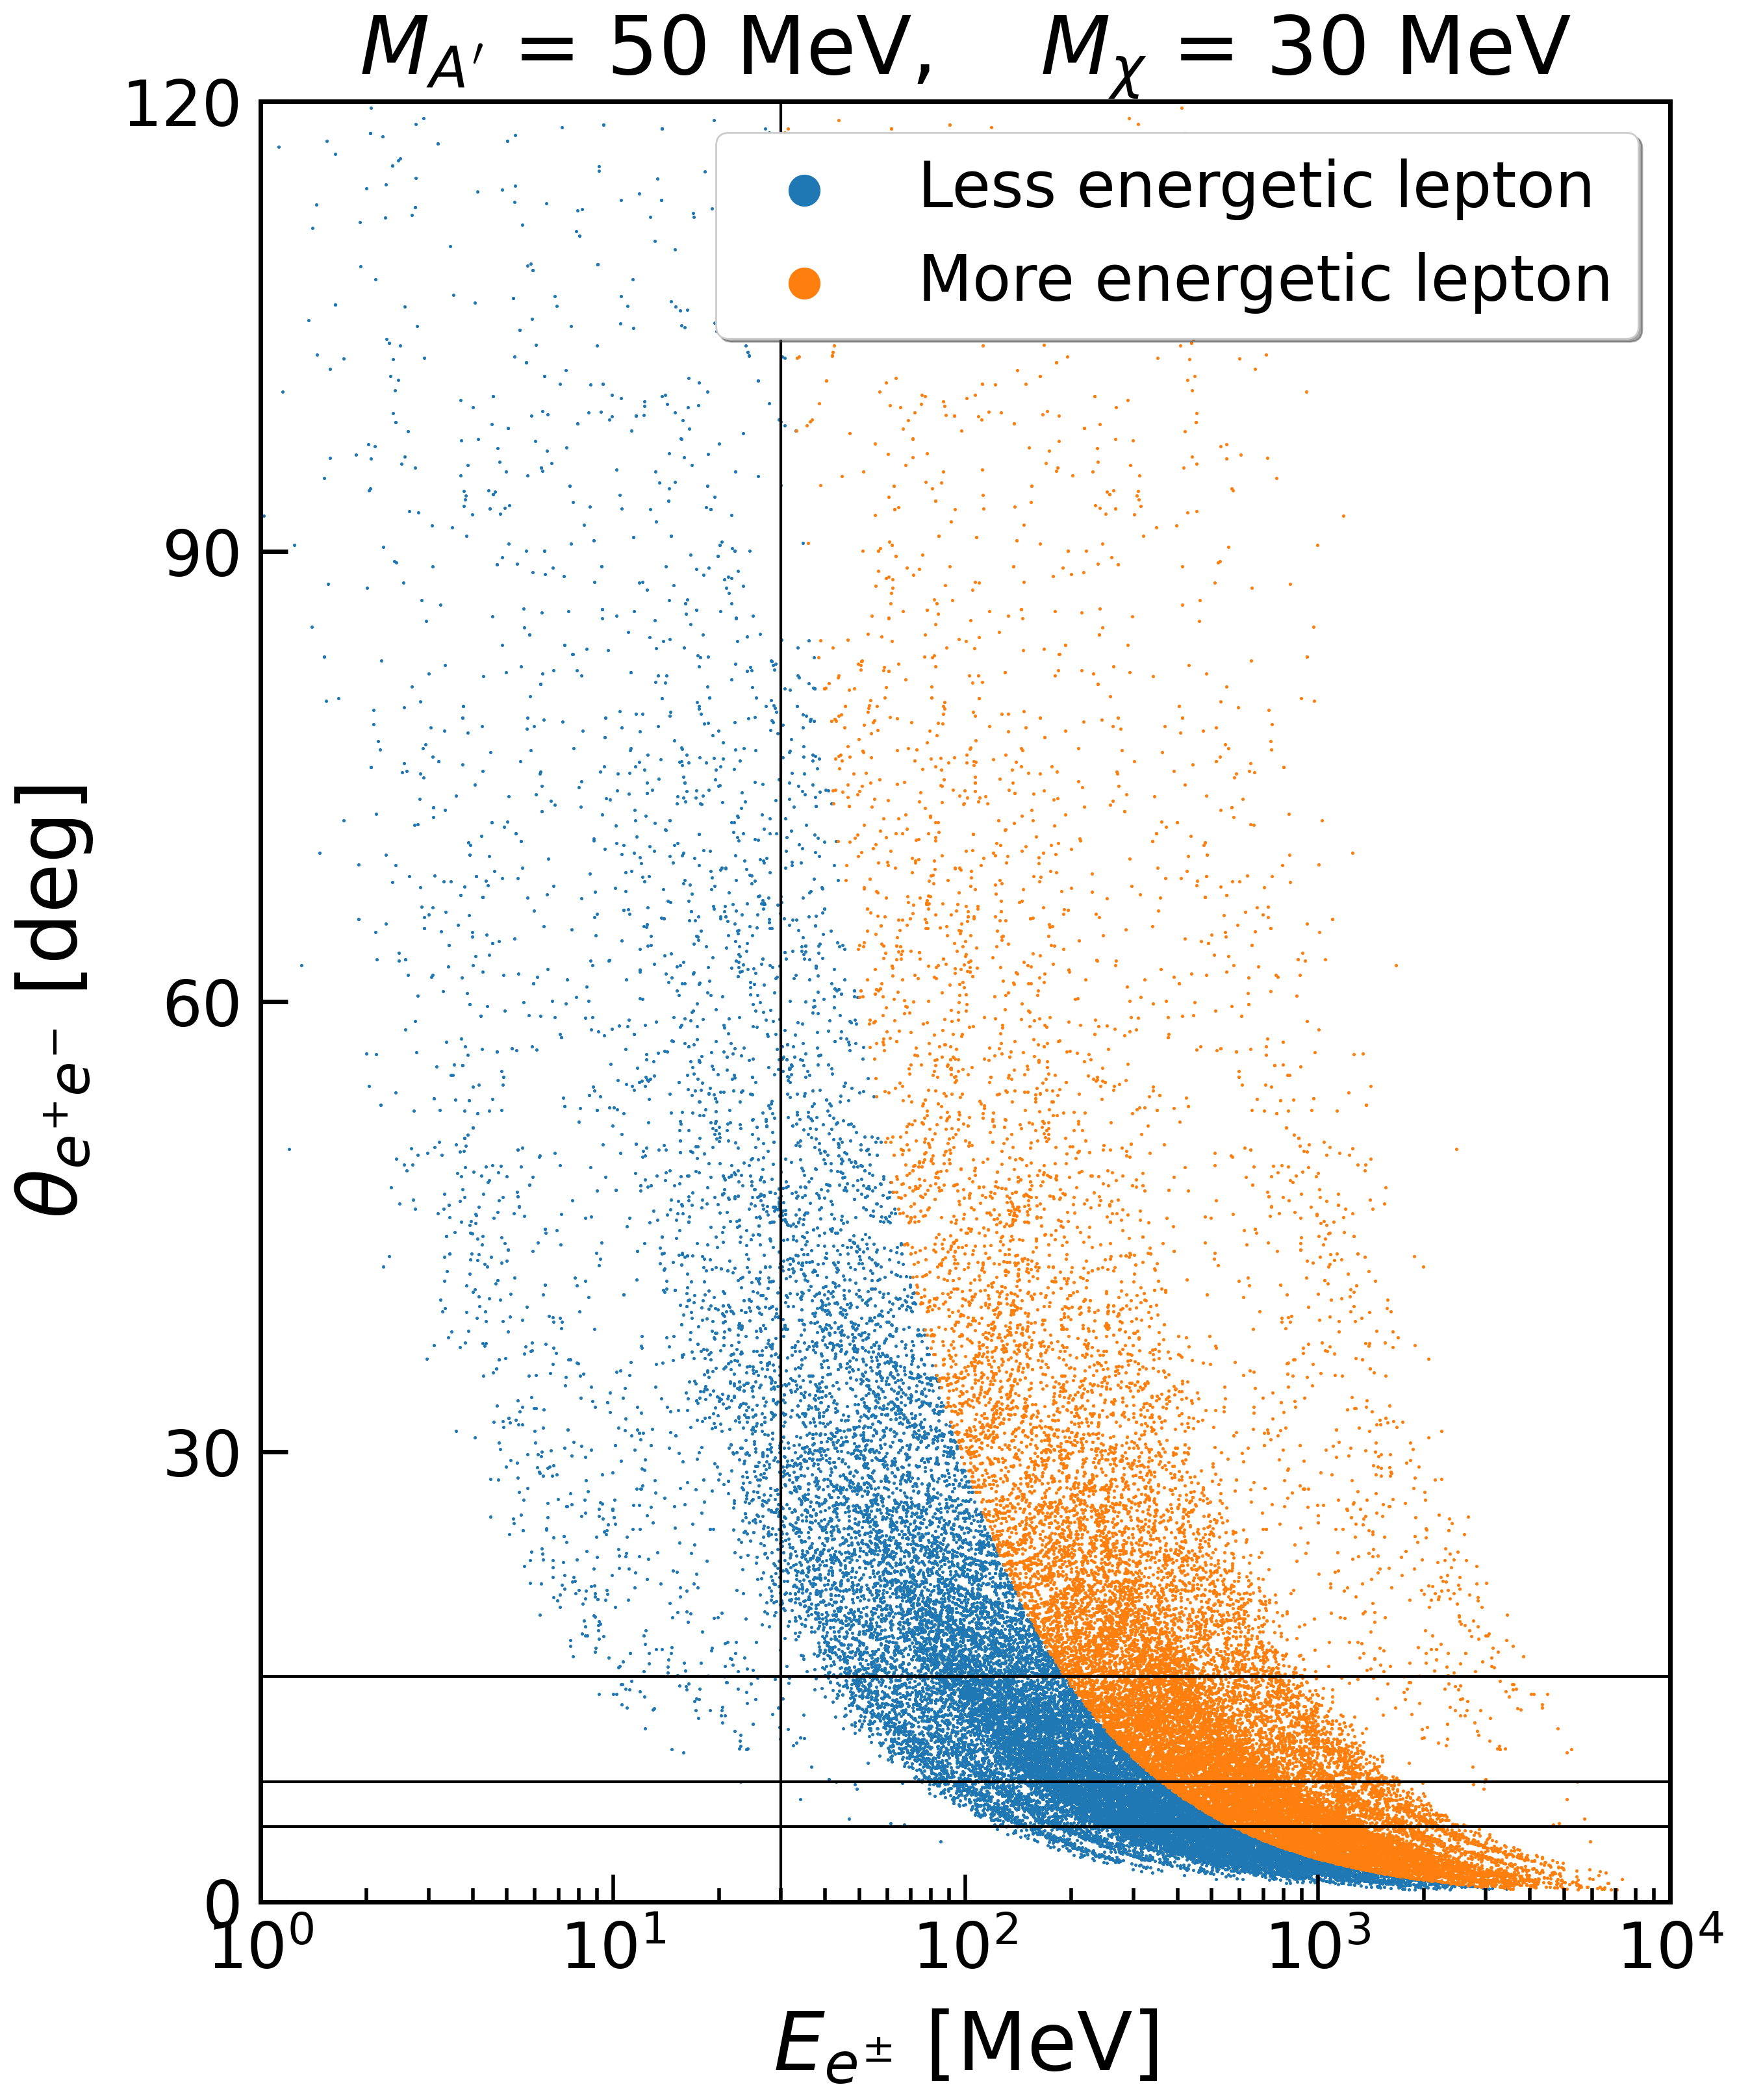

In [15]:
op_angle = op_angle*(180./np.pi)

figure_size = (14,18)
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

plt.scatter(min_energy*1000,op_angle,s=0.7,label='Less energetic lepton')
plt.scatter(max_energy*1000,op_angle,s=0.7,label='More energetic lepton')
plt.tick_params(axis="y", length=15, direction = "in", width=2.5, which='major',pad=10,labelsize=35)
plt.tick_params(axis="x", which='major', direction="in",length=15,width=2.0,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=7.5,width=2.0,labelbottom=False)
plt.title(r"$M_{A'}$ = 50 MeV,    $M_{\chi}$ = 30 MeV",fontsize=title_size,pad=text_padding)
plt.xlabel(r'$E_{e^{\pm}}$ [MeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel(r'$\theta_{e^{+}e^{-}}$ [deg]',fontsize=axis_label_size, labelpad=text_padding)
plt.hlines(5,1e0,10e4,color='black')
plt.hlines(8,1e0,10e4,color='black')
plt.hlines(15,1e0,10e4,color='black')
plt.vlines(30,0.,180.,color='black')
plt.yticks([0., 30, 60, 90, 120])
plt.xlim(1,1e4)
plt.ylim(0.,120.)
plt.xscale('log')
plt.legend(fontsize=35, markerscale=20,shadow=True,loc='upper right')
plt.savefig(figs_dir + "electron_positron_op_angle_energy_dist_0.05_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "electron_positron_op_angle_energy_dist_0.05_ratio_0.6.png", bbox_inches="tight")
plt.show()

In [16]:
min_energy = np.array([])
max_energy = np.array([])
e_px = np.array([])
p_px = np.array([])
e_py = np.array([])
p_py = np.array([])
e_pz = np.array([])
p_pz = np.array([])
v_x = np.array([])
v_y = np.array([])
v_z = np.array([])
v_t = np.array([])
invariant_mass = np.array([])




vertex_vars = ["mctruth_daughters_pdg", "mctruth_daughters_E", "mctruth_daughters_px", "mctruth_daughters_py",
               "mctruth_daughters_pz","mctruth_daughters_startx","mctruth_daughters_starty",
               "mctruth_daughters_startz","mctruth_daughters_time"]

input_file = base_dir + "run1_dt_ratio_0.6_ma_0.01_pi0_sp.root"
#input_file = base_dir + "run3_dt_ratio_0.6_ma_0.05_pi0_sp.root"
input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
df = input_tree.pandas.df(vertex_vars, flatten=False)
df.head()


for i in range(len(df)):
        this_row= df.iloc[i]
        e_px = np.append(e_px,this_row['mctruth_daughters_px'][3])
        e_py = np.append(e_py,this_row['mctruth_daughters_py'][3])
        e_pz = np.append(e_pz,this_row['mctruth_daughters_pz'][3])
        p_px = np.append(p_px,this_row['mctruth_daughters_px'][2])
        p_py = np.append(p_py,this_row['mctruth_daughters_py'][2])
        p_pz = np.append(p_pz,this_row['mctruth_daughters_pz'][2])
        v_x = np.append(v_x,this_row['mctruth_daughters_startx'][2])
        v_y = np.append(v_y,this_row['mctruth_daughters_starty'][2])
        v_z = np.append(v_z,this_row['mctruth_daughters_startz'][2])
        v_t = np.append(v_t,this_row['mctruth_daughters_time'][2])
        temp_min_energy = np.minimum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        temp_max_energy = np.maximum(this_row['mctruth_daughters_E'][2],this_row['mctruth_daughters_E'][3])
        min_energy = np.append(min_energy,temp_min_energy)
        max_energy = np.append(max_energy,temp_max_energy)
        e_p = np.sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)
        p_p = np.sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)
        op_angle = (e_px*p_px + e_py*p_py + e_pz*p_pz)/(e_p*p_p)
        op_angle = np.arccos(op_angle)


#input_file = base_dir + "run1_dt_ratio_0.6_ma_0.01_eta_sp.root"
#input_file = base_dir + "run3_dt_ratio_0.6_ma_0.05_pi0_sp.root"

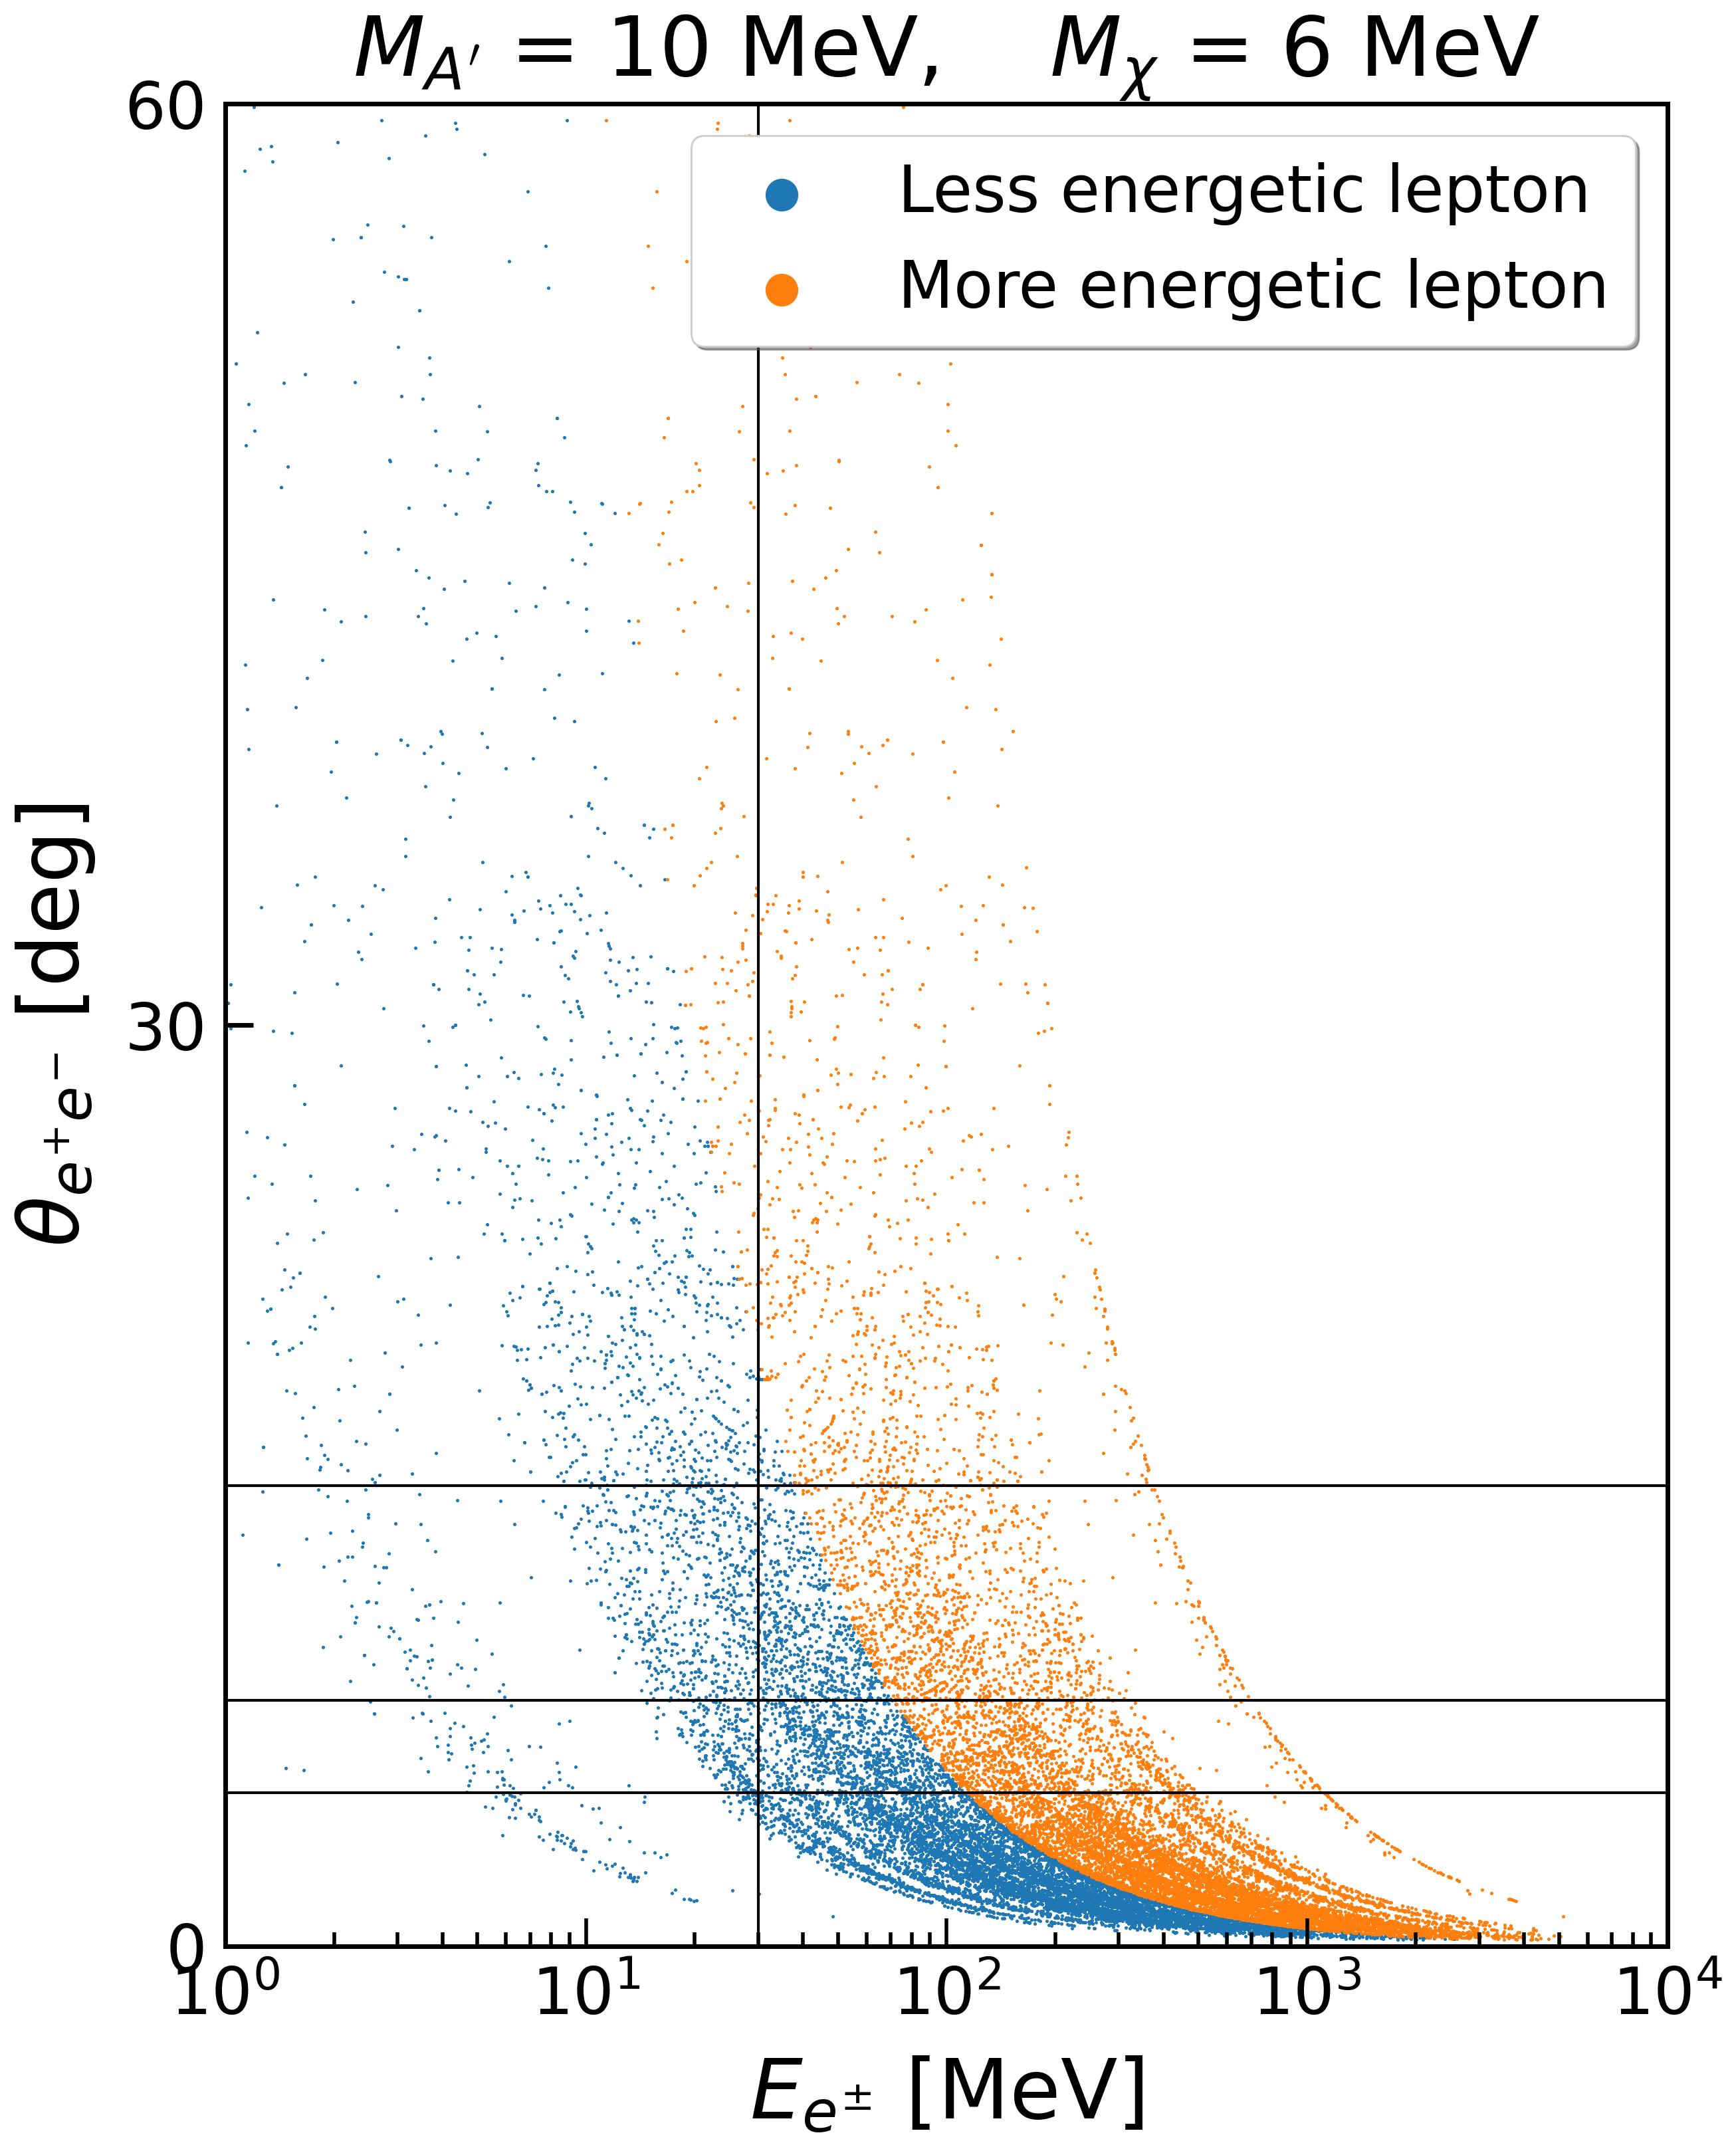

In [17]:
op_angle = op_angle*(180./np.pi)

figure_size = (14,18)
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

plt.scatter(min_energy*1000,op_angle,s=0.7,label='Less energetic lepton')
plt.scatter(max_energy*1000,op_angle,s=0.7,label='More energetic lepton')
plt.tick_params(axis="y", length=15, direction = "in", width=2.5, which='major',pad=10,labelsize=35)
plt.tick_params(axis="x", which='major', direction="in",length=15,width=2.0,pad=10,labelsize=35)
plt.tick_params(axis="x", which='minor', direction="in",length=7.5,width=2.0,labelbottom=False)
plt.title(r"$M_{A'}$ = 10 MeV,    $M_{\chi}$ = 6 MeV",fontsize=title_size,pad=text_padding)
plt.xlabel(r'$E_{e^{\pm}}$ [MeV]',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel(r'$\theta_{e^{+}e^{-}}$ [deg]',fontsize=axis_label_size, labelpad=text_padding)
plt.hlines(5,1e0,10e4,color='black')
plt.hlines(8,1e0,10e4,color='black')
plt.hlines(15,1e0,10e4,color='black')
plt.vlines(30,0.,180.,color='black')
plt.yticks([0., 30, 60])
plt.xlim(1,1e4)
plt.ylim(0.,60.)
plt.xscale('log')
plt.legend(fontsize=35, markerscale=20,shadow=True,loc='upper right')
plt.savefig(figs_dir + "electron_positron_op_angle_energy_dist_0.01_ratio_0.6.pdf", bbox_inches="tight")
plt.savefig(figs_dir + "electron_positron_op_angle_energy_dist_0.01_ratio_0.6.png", bbox_inches="tight")
plt.show()

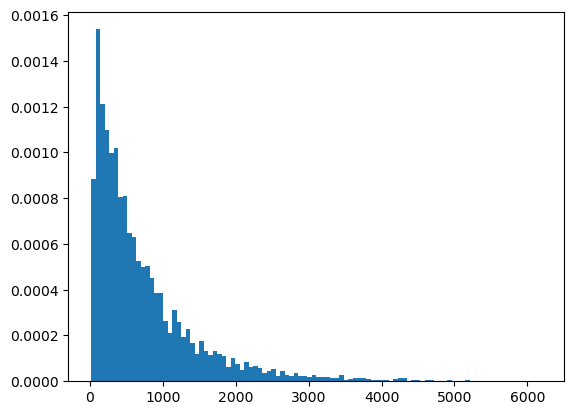

In [18]:
plt.hist(min_energy*1000 + max_energy*1000, bins=100,density=True)
plt.show()

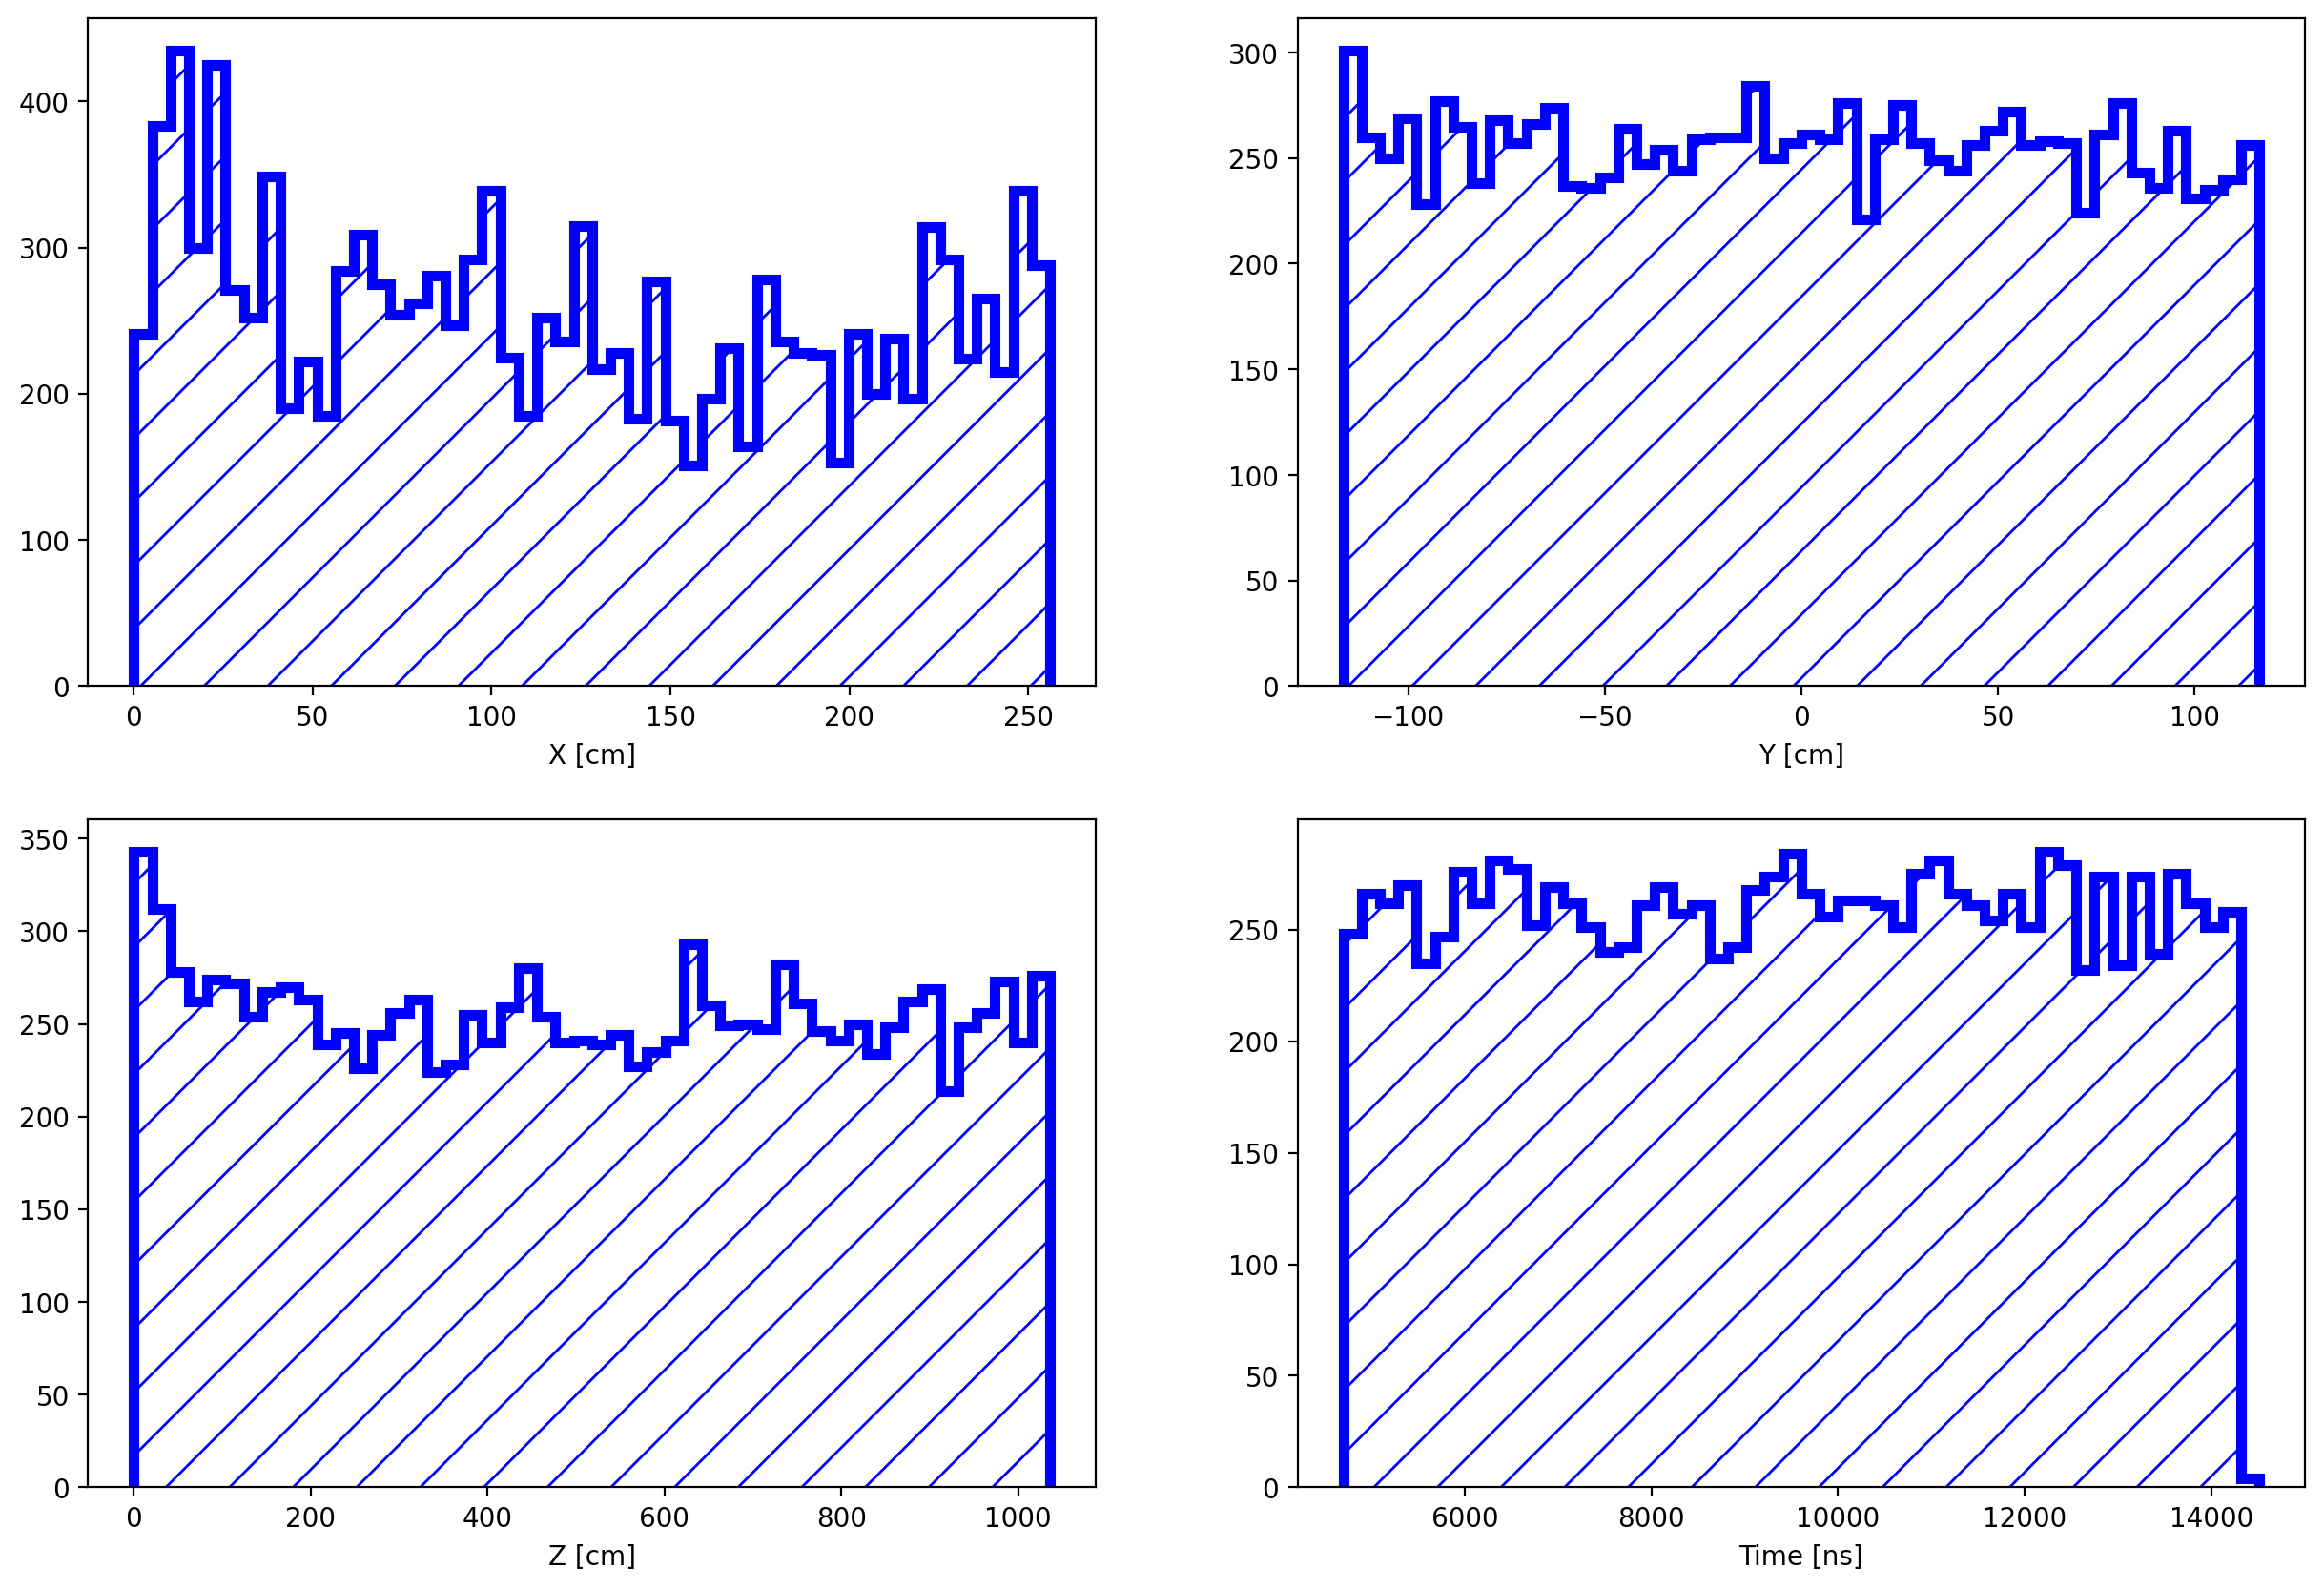

In [19]:
fig, ax = plt.subplots(2,2, dpi=200,figsize=(15,10))
ax[0,0].hist(v_x,bins=50,histtype='step',linewidth=4,hatch='/',facecolor='white',edgecolor='blue',fill=True)
ax[0,0].set_xlabel('X [cm]')
ax[0,1].hist(v_y,bins=50,histtype='step',linewidth=4,hatch='/',facecolor='white',edgecolor='blue',fill=True)
ax[0,1].set_xlabel('Y [cm]')
ax[1,0].hist(v_z,bins=50,histtype='step',linewidth=4,hatch='/',facecolor='white',edgecolor='blue',fill=True)
ax[1,0].set_xlabel('Z [cm]')
ax[1,1].hist(v_t,bins=50,histtype='step',linewidth=4,hatch='/',facecolor='white',edgecolor='blue',fill=True)
ax[1,1].set_xlabel('Time [ns]')
plt.show()